In [3]:
#import libraries for the project
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
import plotly.graph_objects as go
import matplotlib.ticker as ticker #will help later on to identify the money invested

#Just adjusting a bit the configuration for the plots I will create
matplotlib.rcParams['figure.figsize'] = (12,8) 

#Read data
df = pd.read_csv('/home/mfallerhand/movies_project.csv') 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
numeric_columns = ['score', 'votes', 'budget', 'gross', 'runtime']
df_numeric = df[numeric_columns]

# Calculating the correlation matrix
corr_tab = df_numeric.corr()
corr_tab

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.399451,0.309212,0.320447,0.245216,1.000000


In [2]:
#Check different background styles to be sure which one to use for future visualizations
#I will use ggplot
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [8]:
#Type of data


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
#1-Data cleaning

#Missing data in %
for column in df.columns:
    missing_values = np.mean(df[column].isnull())
    print('{}: {}%'.format(column, missing_values))

name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


<AxesSubplot:>

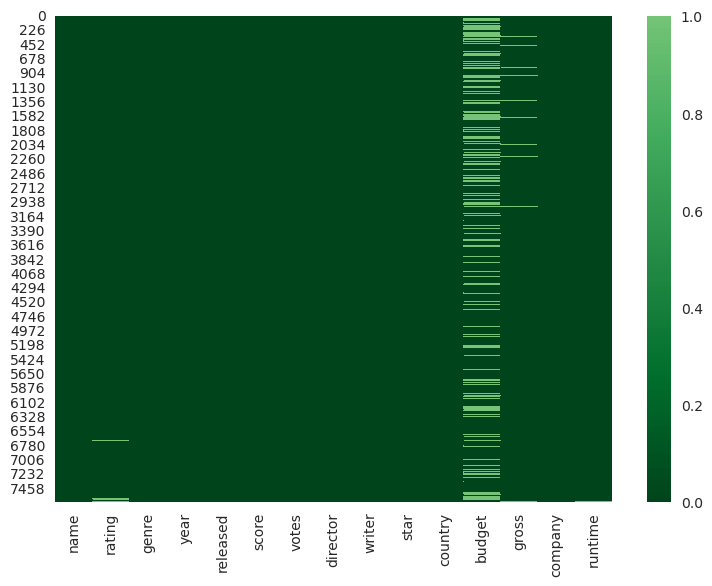

In [59]:
#Show sum of missing values
missing_values = df.isna().sum()
print(missing_values)

plt.figure(figsize=(8, 6))
sns.heatmap(df.isna(), center = True, cmap = 'Greens_r')

The dataset has significant missing values in the budget column (almost 30%) and a smaller but still concerning amount in the gross column (about 2.5%). Dropping these columns isn't ideal because they're crucial for analyzing the movie industry over the years.

Is it possible to fill the missing gross values with the mean budget. However, imputing missing budget values is riskier and may skew results. We'll explore this further in the cleaning and exploratory sections.

The option of using mean (or even median) values would be considered for the gross. When it comes to budget most probably the analysis would be performed with the 70%+ of the data collected that could give contudent information regarding the film industry from 1980 to 2010, avoiding missleading on profit numbers.

In [23]:
#Look into the name of each column to determine which would be used and which not
features = df.columns
print("\nColumns in the Movie Dataset:")
for feature in features:
    print(feature)



Columns in the Movie Dataset:
name
rating
genre
year
released
score
votes
director
writer
star
country
budget
gross
company
runtime


Some columns like rating (it shows the film audience target and restrictions; score is the important one showing film reviews average), released (it is much better take into consideration year), votes, company will not be of any use for the data analysis project.

In [28]:
#Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())



Number of duplicate rows: 0


At least great news, there isn't any duplications. Up to now the concerning points are the missing values for budget and gross.

In [24]:
#released, rating and company won't be relevant for the analysis 
#Remove them
columns_to_drop = df.drop(['rating', 'released', 'company'], axis=1)
print(columns_to_drop)

                                                name      genre  year  score  \
0                                        The Shining      Drama  1980    8.4   
1                                    The Blue Lagoon  Adventure  1980    5.8   
2     Star Wars: Episode V - The Empire Strikes Back     Action  1980    8.7   
3                                          Airplane!     Comedy  1980    7.7   
4                                         Caddyshack     Comedy  1980    7.3   
...                                              ...        ...   ...    ...   
7663                                    More to Life      Drama  2020    3.1   
7664                                     Dream Round     Comedy  2020    4.7   
7665                                   Saving Mbango      Drama  2020    5.7   
7666                                    It's Just Us      Drama  2020    NaN   
7667                                       Tee em el     Horror  2020    5.7   

          votes         director       

In [4]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1           

In [7]:
#Let's try to get the average value on the missing data for gross to replace the nan values
#As per budget not step will be taken as decided before, we will work on the dataset we already have
#Then just replacer the gross by the mean as per each nan 
mean_gross = df['gross'].mean()
df['gross'] = df['gross'].fillna(mean_gross)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


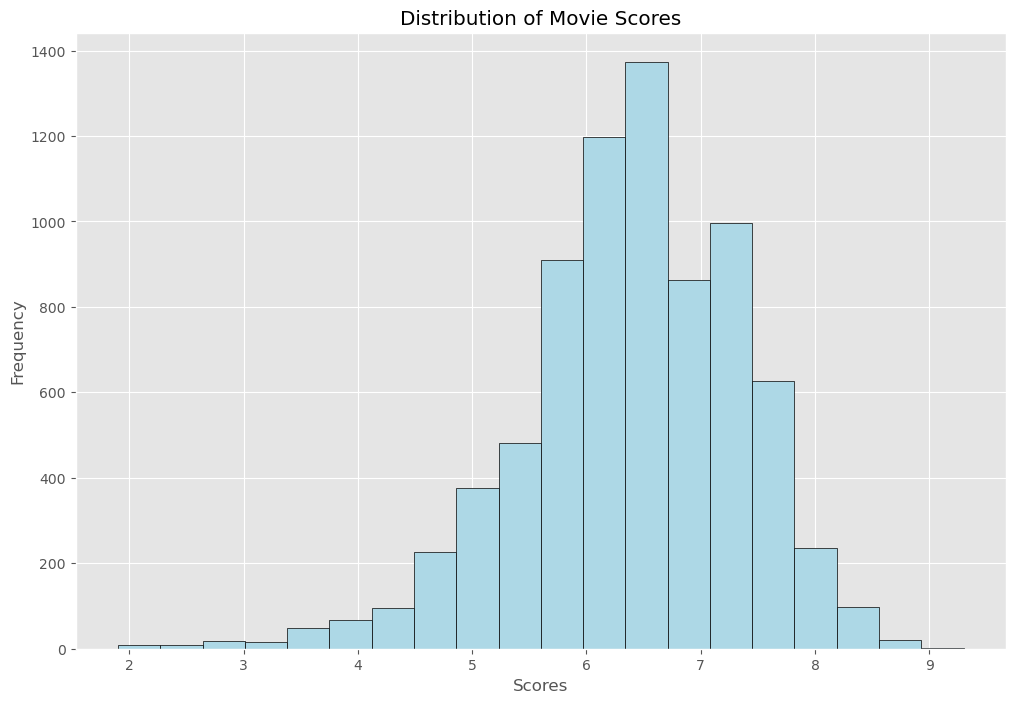

In [26]:
#2-Let's explore the data

#Distribution of movie per scores
plt.hist(df['score'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Movie Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

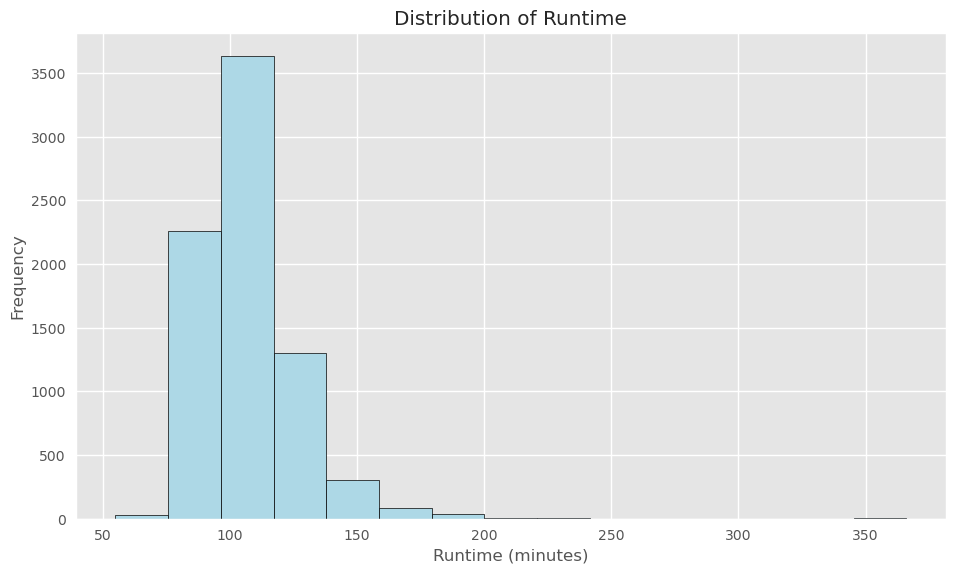

In [65]:
#Distribution of movies' runtime
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=15, color='lightblue', edgecolor='black')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Between 100-120 minutes.

In [27]:
#Confirm the yearas available on database for next consults
df['year'].unique()


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [42]:
#Now I want to see each genre and quantity of film each
df['genre'].value_counts()


genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

The main genres are:
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322

For further exploration on genres the filter would be at least 100 movies on each gere to get rid of the genres that have not weight.

In [8]:
#Checking up last decade' data
df[(df['year'] >= 2010) & (df['year'] < 2020)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,836836967.0,Warner Bros.,148.0
5644,Iron Man 2,PG-13,Action,2010,"May 7, 2010 (United States)",7.0,746000.0,Jon Favreau,Justin Theroux,Robert Downey Jr.,United States,200000000.0,623933331.0,Paramount Pictures,124.0
5645,Shutter Island,R,Mystery,2010,"February 19, 2010 (United States)",8.2,1200000.0,Martin Scorsese,Laeta Kalogridis,Leonardo DiCaprio,United States,80000000.0,294805697.0,Paramount Pictures,138.0
5646,Scott Pilgrim vs. the World,PG-13,Action,2010,"August 13, 2010 (United States)",7.5,394000.0,Edgar Wright,Michael Bacall,Michael Cera,United States,60000000.0,48917974.0,Universal Pictures,112.0
5647,Grown Ups,PG-13,Comedy,2010,"June 25, 2010 (United States)",5.9,233000.0,Dennis Dugan,Adam Sandler,Adam Sandler,United States,80000000.0,271457301.0,Columbia Pictures,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,Chasing the Dragon II: Wild Wild Bunch,Not Rated,Action,2019,"June 7, 2019 (United States)",5.8,523.0,Jason Kwan,Koon-Nam Lui,Tony Ka Fai Leung,China,NaN,45738461.0,Bona Film Group,101.0
7639,Round of Your Life,NaN,Family,2019,"June 21, 2019 (United States)",4.6,150.0,Dylan Thomas Ellis,Tim Ogletree,Cole Allen,United States,NaN,20941.0,Aristar Entertainment,91.0
7640,El Coyote,R,Action,2019,"October 4, 2019 (United States)",3.0,122.0,Jeffrey Nicholson,Jeffrey Nicholson,Michael Saquella,United States,NaN,1101470.0,Cactus Blue Entertainment,93.0
7641,By Light of Desert Night,NaN,Drama,2019,"March 3, 2020 (United States)",4.8,373.0,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,NaN,NaN,Canyon Media,94.0


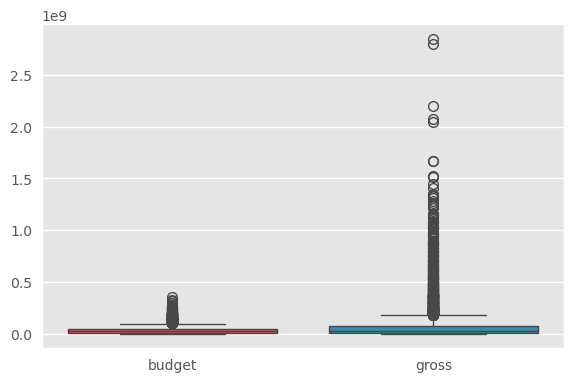

In [66]:
#Boxplot budget and gross revenues
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[['budget', 'gross']])
plt.show()

In [13]:
#Calculate average score of genres with enough voluem of data (considering the genre counts above)

chosen_genres = ['Comedy', 'Action', 'Drama', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror']
average_scores_genre = (df[df['genre']
                          .isin(chosen_genres)]
                            .groupby('genre')['score'].mean()
)
average_scores_genre



genre
Action       6.202817
Adventure    6.291569
Animation    6.769231
Biography    7.030926
Comedy       6.193987
Crime        6.671506
Drama        6.693668
Horror       5.750621
Name: score, dtype: float64

As we have seen before, the range of scores are between 5.8 and 7.

In [13]:
df['genre'].describe()

count       7668
unique        19
top       Comedy
freq        2245
Name: genre, dtype: object

In [9]:
df['score'].describe()

count    7665.000000
mean        6.390411
std         0.968842
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

In [2]:
#Calculate average score based on the country
avg_score_country = df.groupby('country')['score'].mean()
print(avg_score_country)

country
Argentina                         7.687500
Aruba                             4.900000
Australia                         6.682609
Austria                           7.020000
Belgium                           7.137500
Brazil                            7.700000
Canada                            6.134737
Chile                             6.600000
China                             6.702500
Colombia                          7.400000
Czech Republic                    6.075000
Denmark                           7.100000
Federal Republic of Yugoslavia    8.100000
Finland                           6.033333
France                            6.743728
Germany                           6.436752
Greece                            7.400000
Hong Kong                         6.708889
Hungary                           6.983333
Iceland                           6.400000
India                             7.240323
Indonesia                         7.800000
Iran                              7.970000
Ire

In [14]:
#And the same just for the top 10
top_10 = (df.groupby('country')['score']
          .mean()
          .round(2)
          .nlargest(10)
)
print(top_10) 

country
Lebanon                           8.40
Libya                             8.30
Soviet Union                      8.20
Federal Republic of Yugoslavia    8.10
Republic of Macedonia             8.00
Iran                              7.97
Romania                           7.90
Turkey                            7.87
Indonesia                         7.80
Taiwan                            7.74
Name: score, dtype: float64


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

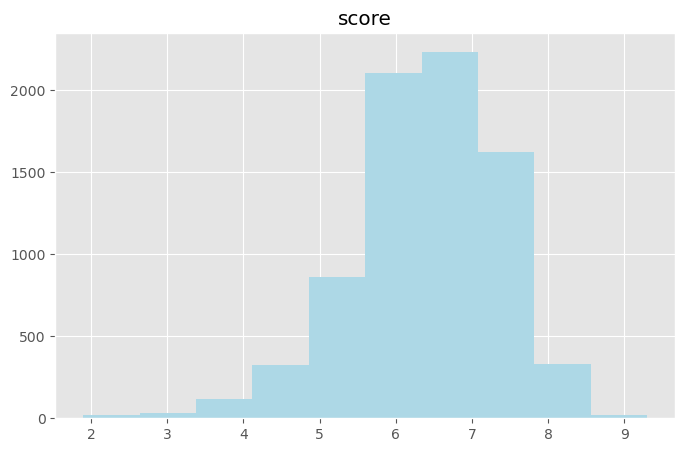

In [15]:
df.hist(column='score', figsize=(8,5), color='lightblue')

<AxesSubplot:>

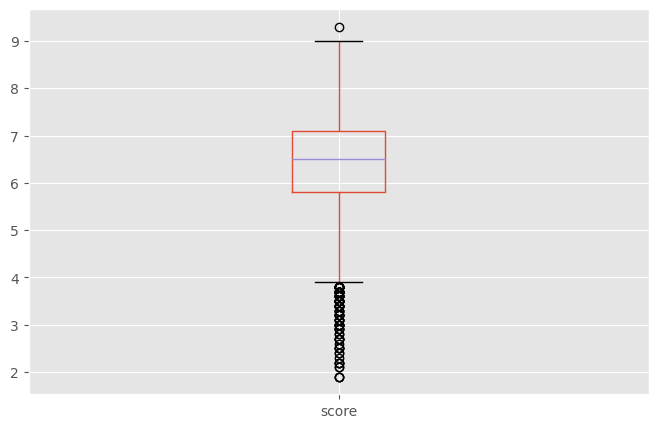

In [22]:
df.boxplot(column='score', figsize=(8,5))


In [45]:
#Movies per country
country_count = df['country'].value_counts()
print(country_count)

country
United States                     5475
United Kingdom                     816
France                             279
Canada                             190
Germany                            117
Australia                           92
Japan                               81
India                               62
Italy                               61
Spain                               47
Hong Kong                           45
Ireland                             43
China                               40
South Korea                         35
Denmark                             32
Sweden                              25
New Zealand                         25
Mexico                              22
Norway                              12
West Germany                        12
Netherlands                         12
Iran                                10
Switzerland                         10
Russia                               8
Belgium                              8
Argentina        

In [12]:
#Let's try to be more accurate while searching for movie' scores by country
#I want to avoid the score of countries with very few films in database
#10 top score countries whit at least 6 films released
top_10_film_per_country = (df[df.groupby('country')['country'].transform('size') > 5]
                           .groupby('country')['score']
                           .mean()
                           .round(2)
                           .nlargest(10))

top_10_film_per_country


country
Iran            7.97
Taiwan          7.74
Brazil          7.70
Argentina       7.69
New Zealand     7.42
Russia          7.35
Sweden          7.33
India           7.24
Japan           7.22
West Germany    7.18
Name: score, dtype: float64

In [4]:
#And now with at least 10
top_10_film_per_country = (df[df.groupby('country')['country'].transform('size') >= 10]
                           .groupby('country')['score']
                           .mean()
                           .round(2)
                           .nlargest(10))

top_10_film_per_country

country
Iran            7.97
New Zealand     7.42
Sweden          7.33
India           7.24
Japan           7.22
West Germany    7.18
South Korea     7.16
Switzerland     7.13
Denmark         7.10
Spain           7.09
Name: score, dtype: float64

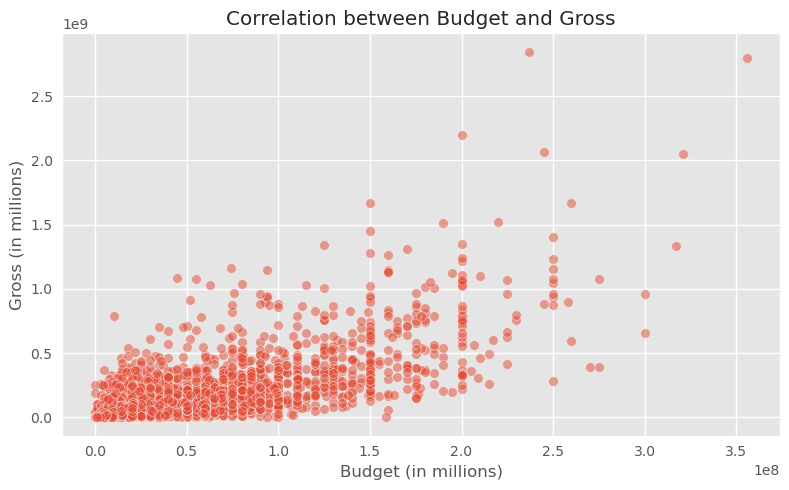

Pearson Correlation coefficient: 0.7403948929894827


In [67]:
#Correlation of budget and gross revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='budget', y='gross', data=df, alpha=0.5)
plt.title('Correlation between Budget and Gross')
plt.xlabel('Budget (in millions)')
plt.ylabel('Gross (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df['budget'].corr(df['gross'], method = 'pearson')
print("Pearson Correlation coefficient:", correlation)

In [11]:
#Top directors based on the average gross revenue of their movies
avg_gross_by_director = df.groupby('director')['gross'].mean().reset_index()
avg_gross_by_director = avg_gross_by_director.sort_values(by='gross', ascending=False) #sort in descending order to get the higher first
avg_gross_by_director['gross'] = avg_gross_by_director['gross'] / 1000000
top_directors = avg_gross_by_director.head(10)
top_directors 

,director,gross
162,Anthony Russo,1368.849797
1639,Kyle Balda,1097.122396
1509,Josh Cooley,1073.394593
432,Chris Buck,1059.908951
1678,Lee Unkrich,937.394349
1155,James Cameron,892.584083
679,David Yates,860.227414
963,George Lucas,849.751079
1125,J.J. Abrams,776.562577
2393,Robert Stromberg,758.411779


In [8]:
#Top stars based on the average score of their movies
avg_score_by_stars = df.groupby('star')['score'].mean().reset_index()
avg_score_by_stars = avg_score_by_stars.sort_values(by='score', ascending=False)
top_stars = avg_score_by_stars.head(10)
print(top_stars)

                     star  score
69    Alexandre Rodrigues    8.6
1684      Luigi Lo Cascio    8.5
1745          Mark Hamill    8.5
1457        Kay Kay Menon    8.5
2139      Philippe Noiret    8.5
222             Ben Burtt    8.4
2790         Yôji Matsuda    8.4
2694          Ulrich Mühe    8.4
160      Anthony Gonzalez    8.4
2803       Zain Al Rafeea    8.4


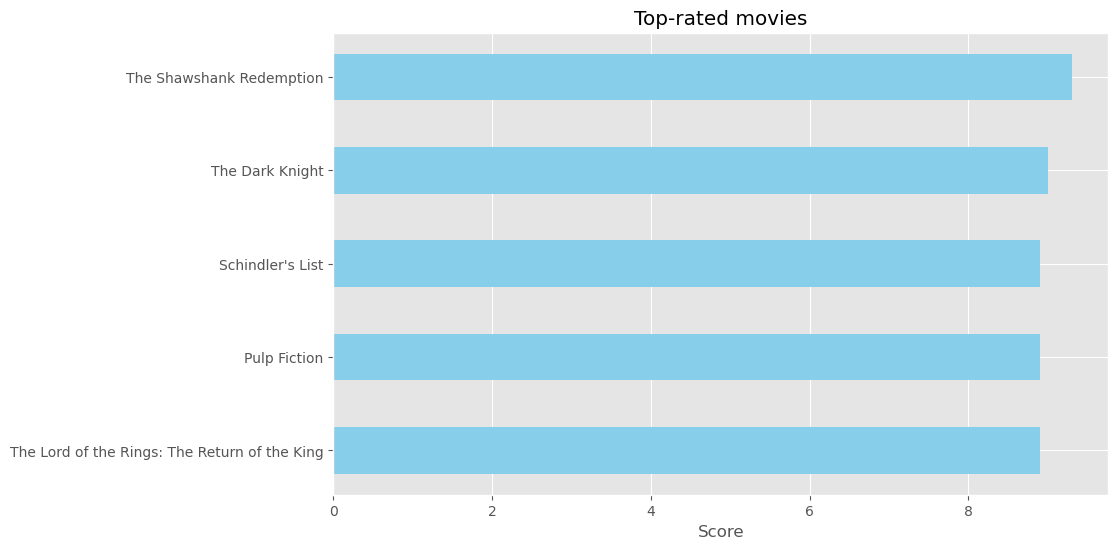

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0


In [33]:
#3-Data visualization

#Top rated movies in whole data base 
top_rated_movies = df.sort_values(by='score', ascending=False).head()
plt.figure(figsize=(10, 6))
plt.barh(top_rated_movies['name'], top_rated_movies['score'], color='skyblue', height=0.5)
plt.xlabel('Score')
plt.title('Top-rated movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()
top_rated_movies

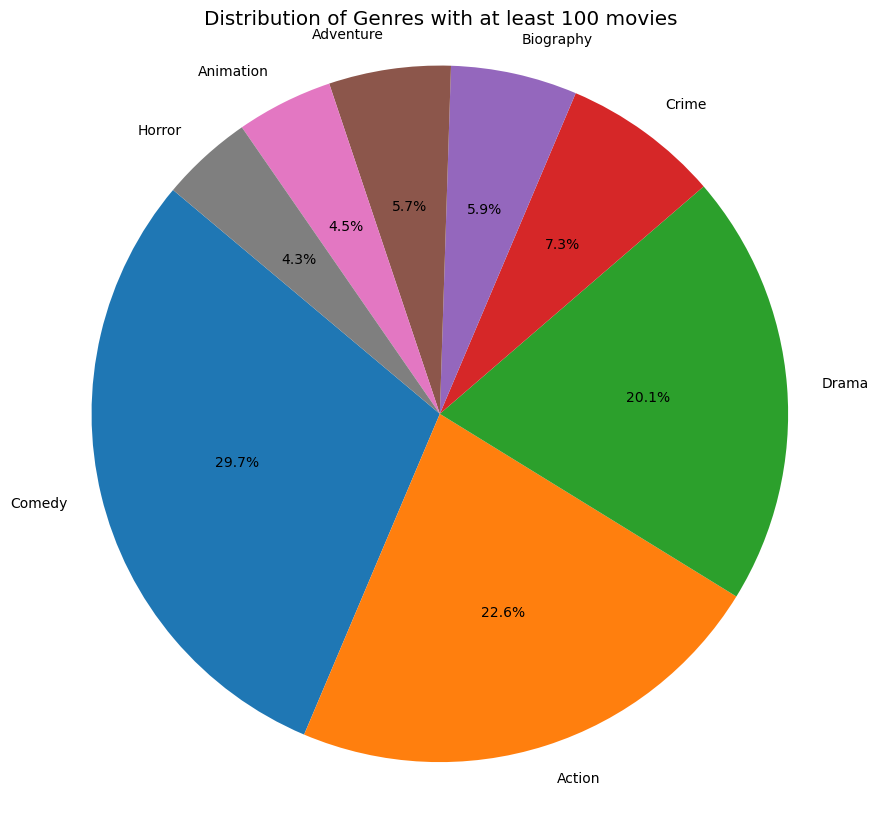

In [28]:
#Distribution of genres across the data set with at least 100 movies
genre_counts = df['genre'].value_counts()
genre_counts_filtered = genre_counts[genre_counts >= 100]

colors = plt.cm.tab10.colors[:len(genre_counts_filtered)] #Avoid some repetition of colors due numerous genres on pie chart

plt.figure(figsize=(10, 10)) 
plt.pie(genre_counts_filtered, labels=genre_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Genres with at least 100 movies')
plt.show()

Comedy, action and drama on the top with close to 3/4 of the total of genres with at least 100 movies.

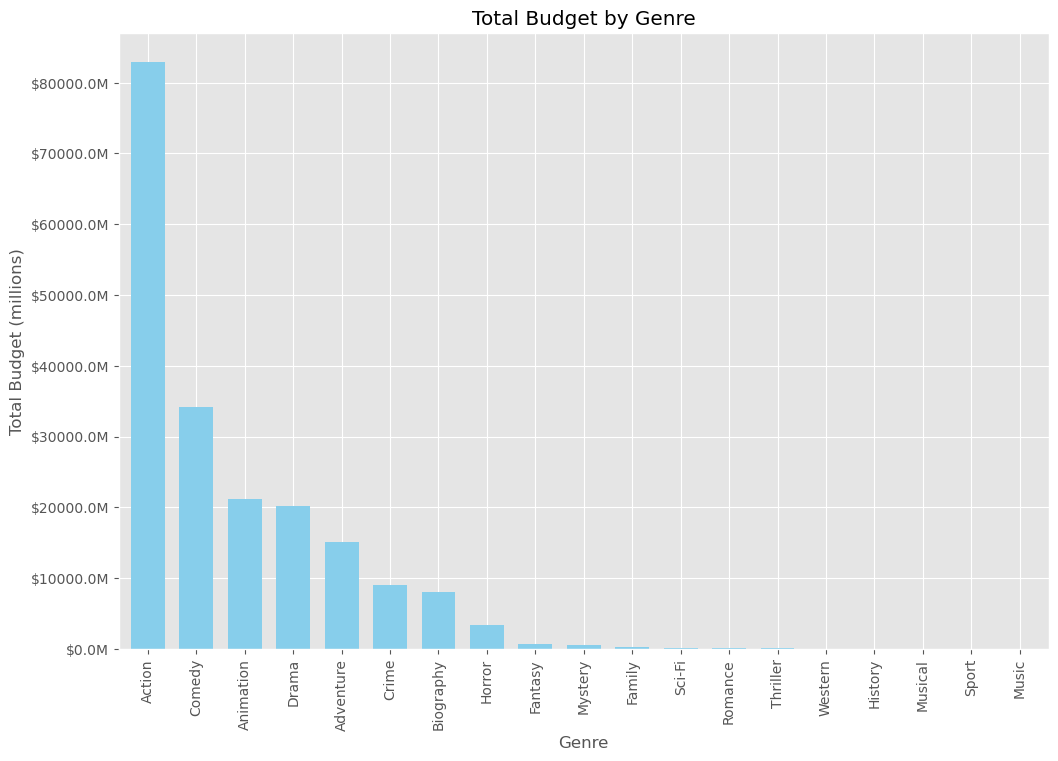

AxesSubplot(0.125,0.11;0.775x0.77)


In [9]:
#Budget by genre
genre_budget = (df.groupby('genre')['budget']
                .sum().sort_values(ascending=False)
                .plot(kind='bar', color='skyblue', width=0.7)
)


plt.xlabel('Genre')
plt.ylabel('Total Budget (millions)')
plt.title('Total Budget by Genre') 
#Make it easier to visualize how much money is about
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/10**6:.1f}M')) 
plt.show()




Action, comedy and animation once again on top. For the first two is not rare as they concentrate the big majority of movies released (with genre drama too) from the dataset. But when it comes to animation is interesting as concentrates only 4.5% of the movies pie chart measuring genres with at least 100 movies. It makes clear that the cost of an animation movie is usually higher but also that the filmakers trust on investing big quantity of money in that genre as it is profitable (we would see it later on).

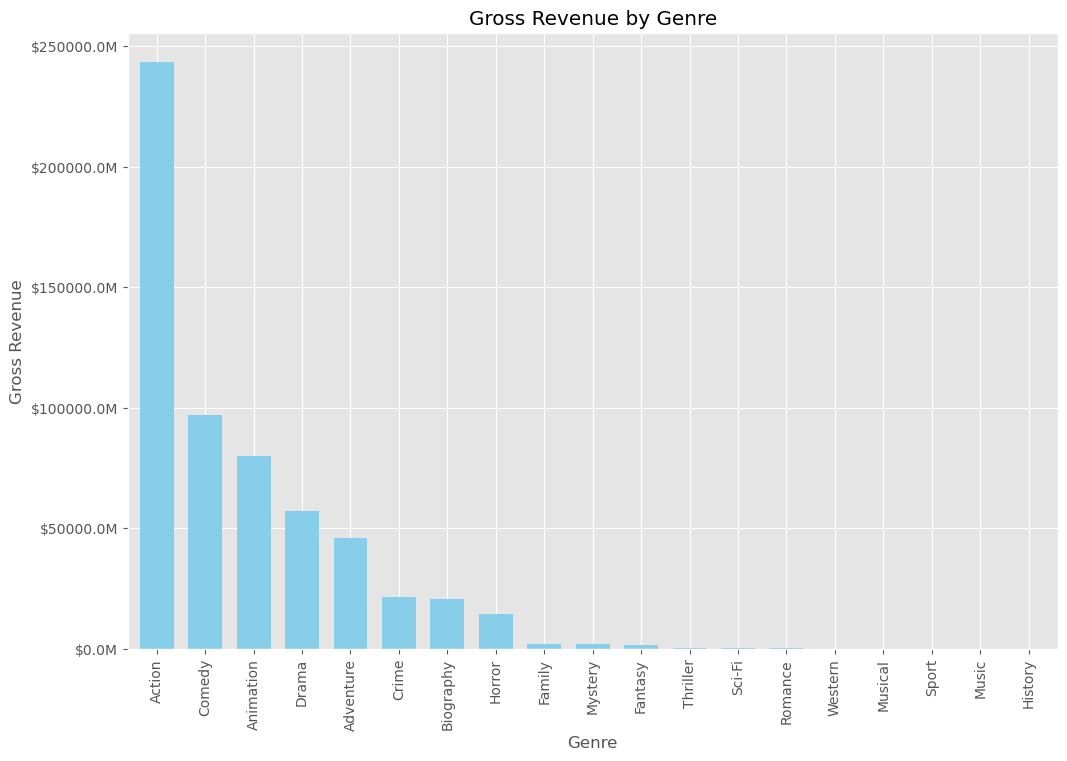

In [12]:
#Gross revenue by genre
genre_budget = (df.groupby('genre')['gross']
                .sum().sort_values(ascending=False)
                .plot(kind='bar', color='skyblue', width=0.7)
)

plt.xlabel('Genre')
plt.ylabel('Gross Revenue')
plt.title('Gross Revenue by Genre') 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/10**6:.1f}M')) 
plt.show()

The 3 top genres in budget investment are also top 3 when it comes to gross revenue.
Animation is getting some distance from drama in terms of profit.

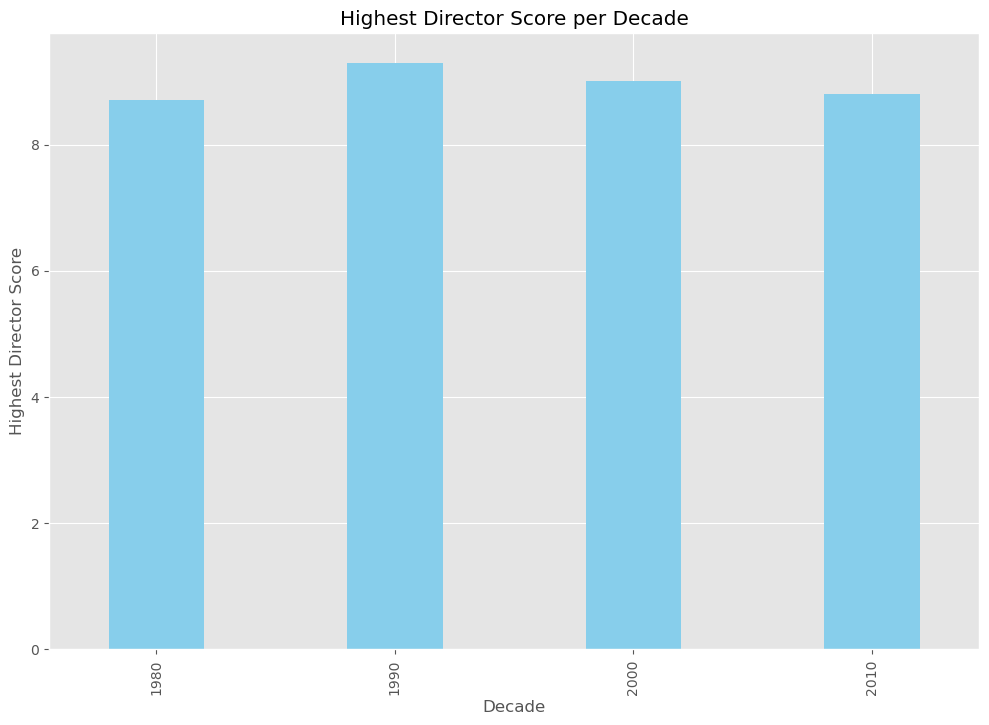

In [16]:
#Highest director score per decade (1980-89; 1990-99; 2000-09; 2010-19) 
df['decade'] = df['year'] // 10 * 10
# Group data by decade and director, and calculate the highest score for each director within each decade
#Will exclude 2020 in order to have just 10-10-10-10, avoiding a bar only for 2020
df_filtered = (
    df[df['year'] != 2020]
    .groupby(['decade', 'director'])['score']
    .max()
    .groupby('decade')
    .max()
    .plot(kind='bar', color='skyblue', width=0.4)
)
                 
plt.xlabel('Decade')
plt.ylabel('Highest Director Score')
plt.title('Highest Director Score per Decade')
plt.show()

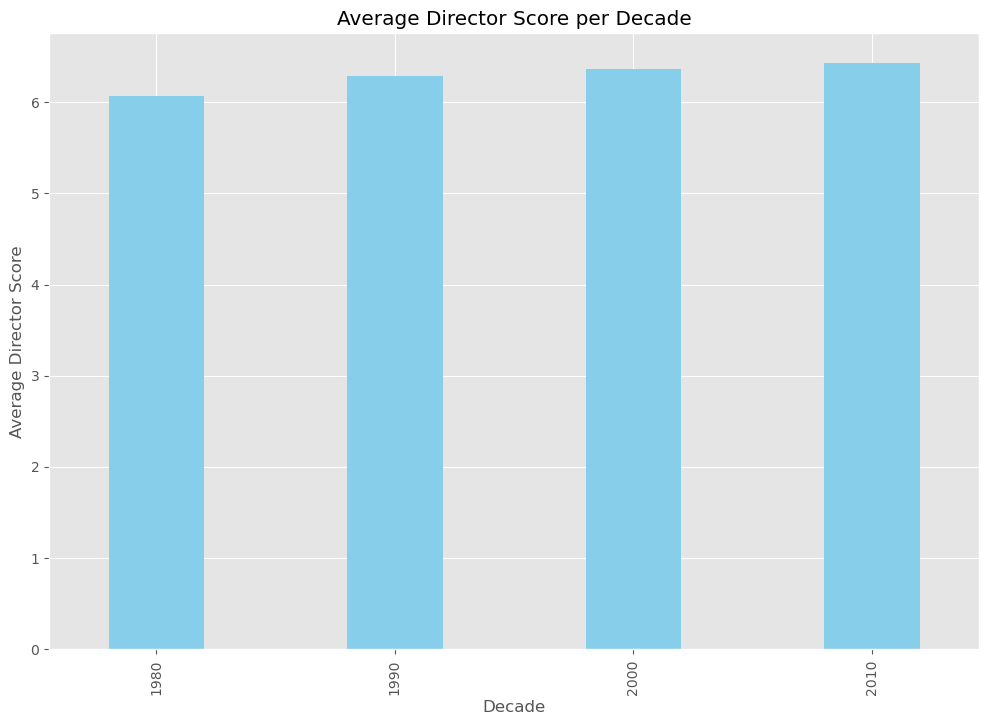

In [18]:
#Now just visualize the average director score per decade following the same parameters as above
df['decade'] = df['year'] // 10 * 10
df_filtered = (
    df[df['year'] != 2020]
    .groupby(['decade', 'director'])['score']
    .mean()
    .groupby('decade')
    .mean()
    .plot(kind='bar', color='skyblue', width=0.4)
)
            
plt.xlabel('Decade')
plt.ylabel('Average Director Score')
plt.title('Average Director Score per Decade')
plt.show()

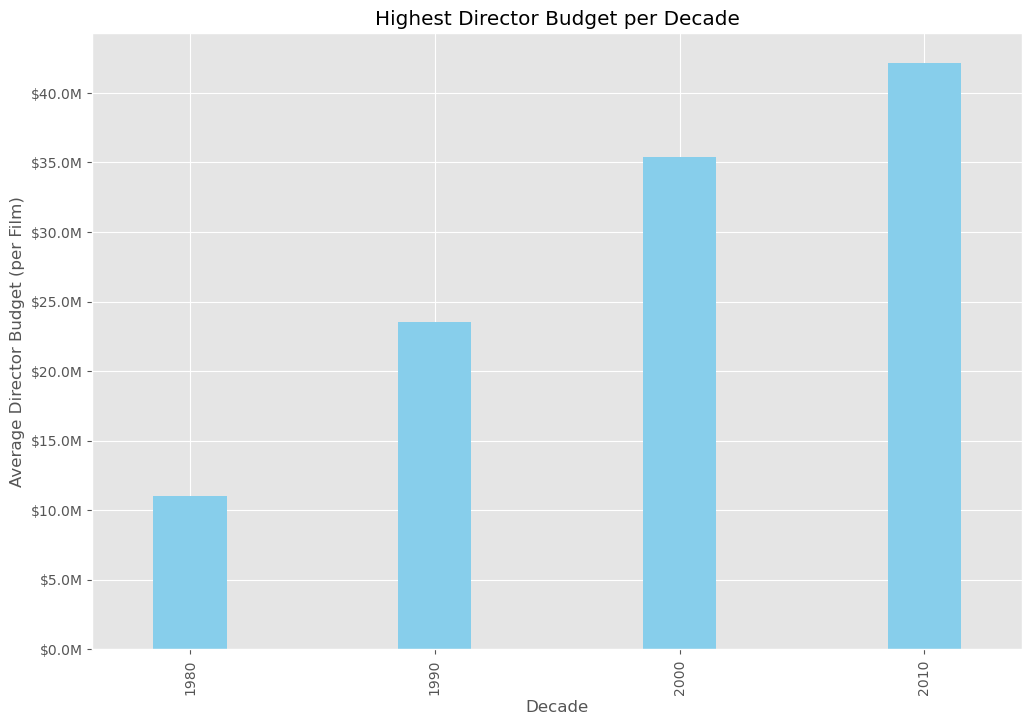

In [23]:
#Average director budget per decade (1980-89; 1990-99; 2000-09; 2010-19)
df['decade'] = df['year'] // 10 * 10
df_filtered = (
    df[df['year'] != 2020]
    .groupby(['decade', 'director'])['budget']
    .mean()
    .groupby('decade')
    .mean()
    .plot(kind='bar', color='skyblue', width=0.3)
)

plt.xlabel('Decade')
plt.ylabel('Average Director Budget (per Film)')
plt.title('Highest Director Budget per Decade')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/10**6:.1f}M')) 
plt.show()



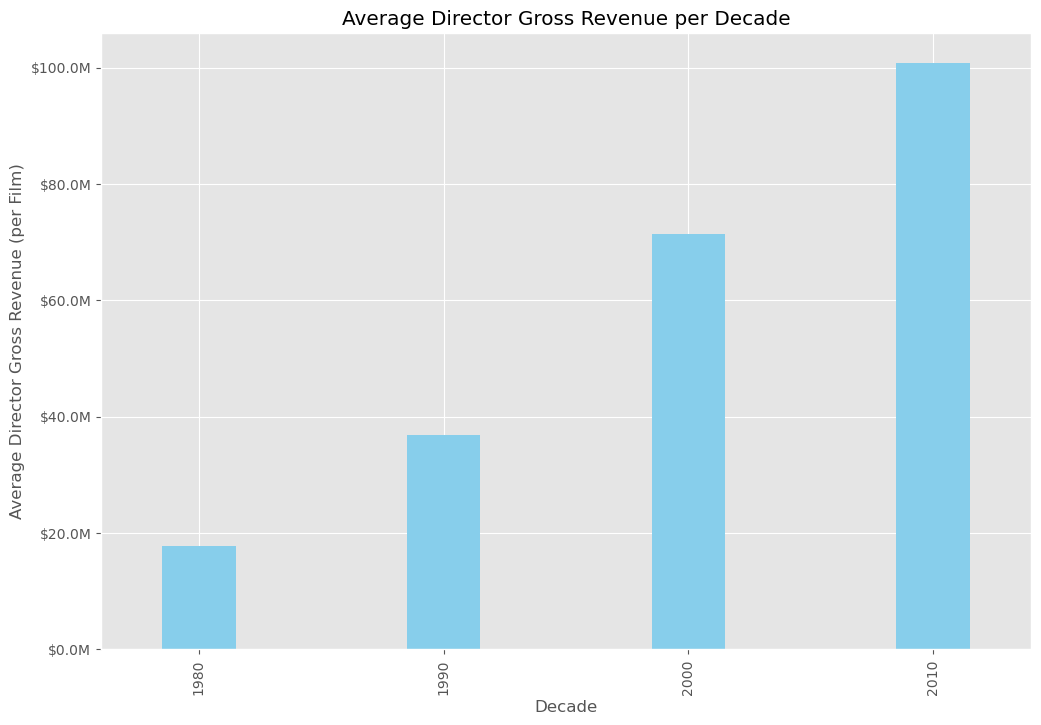

In [51]:
#Average director gross revenue per decade (1980-89; 1990-99; 2000-09; 2010-19) 
df['decade'] = df['year'] // 10 * 10
df_filtered = (
    df[df['year'] != 2020]
    .groupby(['decade', 'director'])['gross']
    .mean()
    .groupby('decade')
    .mean()
    .plot(kind='bar', color='skyblue', width=0.3)
)
            
plt.xlabel('Decade')
plt.ylabel('Average Director Gross Revenue (per Film)')
plt.title('Average Director Gross Revenue per Decade')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/10**6:.1f}M')) 
plt.show()

Five times hugher gross revenue in four decades compared to four times increase of budget. That's a tendency we will see later when looking into trends.

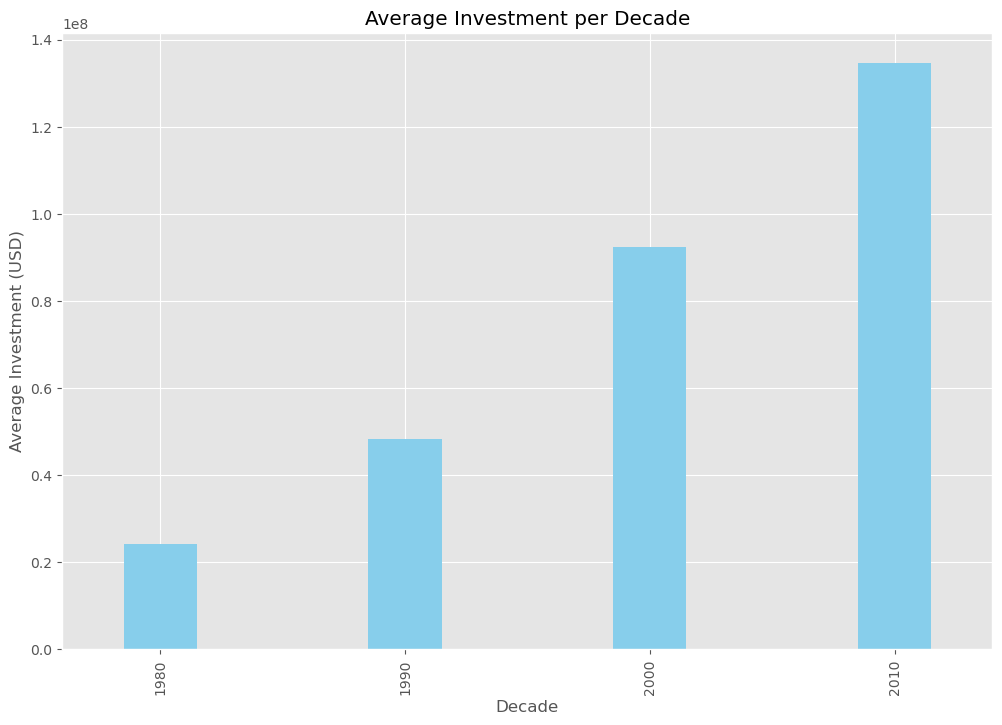

In [22]:
#Average film gross revenue per decade
df['decade'] = df['year'] // 10 * 10
df_filtered = (
    df[df['year'] != 2020]
    .groupby(['decade'])['gross']
    .mean()
    .groupby('decade')
    .mean()
    .plot(kind='bar', color='skyblue', width=0.3)
)

                 
plt.xlabel('Decade')
plt.ylabel('Average Investment (USD)')
plt.title('Average Investment per Decade')
plt.show()

The increase of investment decade by decade is notory. 

Text(0.5, 1.0, 'Average Revenue vs. Average Score by Genre')

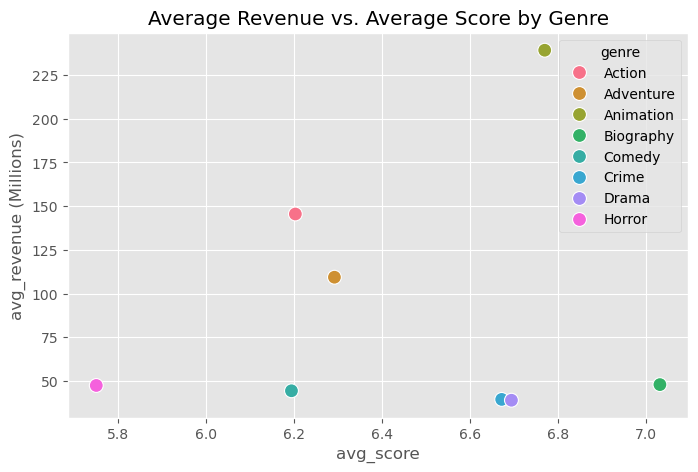

In [39]:
# Find genres with at least 300 movies recorded and chech average score per average gross revenue
genres_with_min_quantity = df['genre'].value_counts()[df['genre'].value_counts() >= 300].index
filtered_df = df[df['genre'].isin(genres_with_min_quantity)]
avg_revenue_genre = filtered_df.groupby('genre')['gross'].mean() / 1000000  # Convert to millions
avg_score_genre = filtered_df.groupby('genre')['score'].mean()
max_stats = pd.DataFrame({'avg_revenue (Millions)': avg_revenue_genre, 'avg_score': avg_score_genre})


plt.figure(figsize=(8, 5))
sns.scatterplot(data=max_stats, x='avg_score', y='avg_revenue (Millions)', hue=max_stats.index, s=100)
plt.title('Average Revenue vs. Average Score by Genre')


Animation is keep showing superb results.

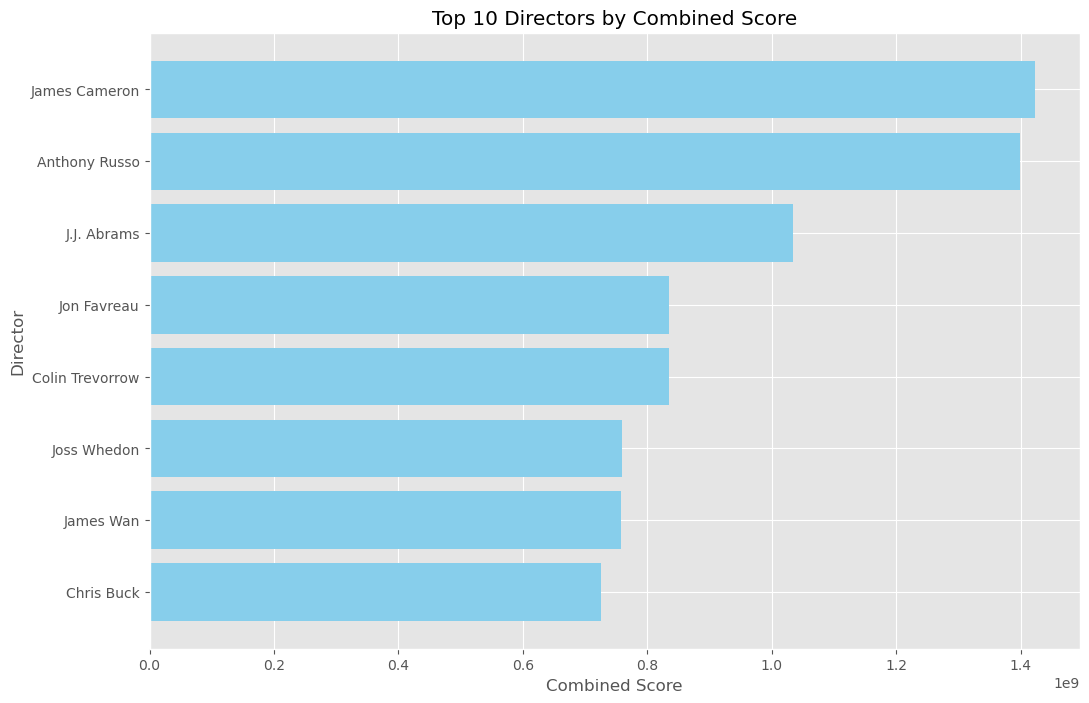

In [14]:
#Let's try to combine score and gross to see the top 10 directors

#We would use a metric giving 50% to score and 50% to gross in the scale
weight_score = 0.5 
weight_gross = 0.5  

df['combined_score'] = (weight_score * df['score']) + (weight_gross * df['gross'])
df_sorted = df.sort_values(by='combined_score', ascending=False)
top_directors = df_sorted.head(10)

plt.barh(top_directors['director'], top_directors['combined_score'], color='skyblue')
plt.xlabel('Combined Score')
plt.ylabel('Director')
plt.title('Top 10 Directors by Combined Score')
plt.gca().invert_yaxis()  #Invert y-axis to have the director with the highest score on top
plt.show()

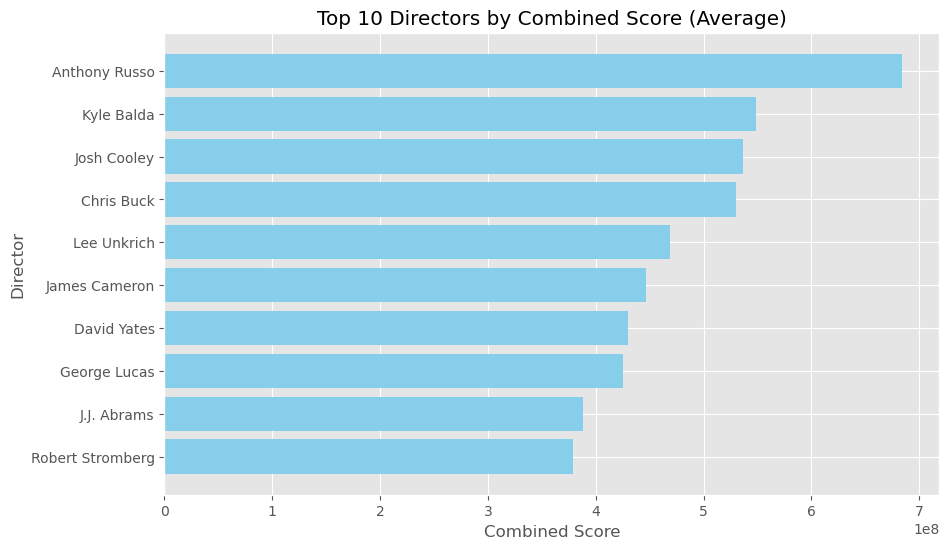

In [13]:
#Now let's do the same but with the average to be more fair
weight_score = 0.5 
weight_gross = 0.5  

#Here we calculate the averages
director_stats = df.groupby('director').agg({'score': 'mean', 'gross': 'mean'}).reset_index()
director_stats['combined_score'] = (weight_score * director_stats['score']) + (weight_gross * director_stats['gross'])
director_stats_sorted = director_stats.sort_values(by='combined_score', ascending=False)
top_directors = director_stats_sorted.head(10)

plt.barh(top_directors['director'], top_directors['combined_score'], color='skyblue')
plt.xlabel('Combined Score')
plt.ylabel('Director')
plt.title('Top 10 Directors by Combined Avg Score and Avg Gross')
plt.gca().invert_yaxis()  #Again I invert the y-axis to have the director with the highest score on top
plt.show()

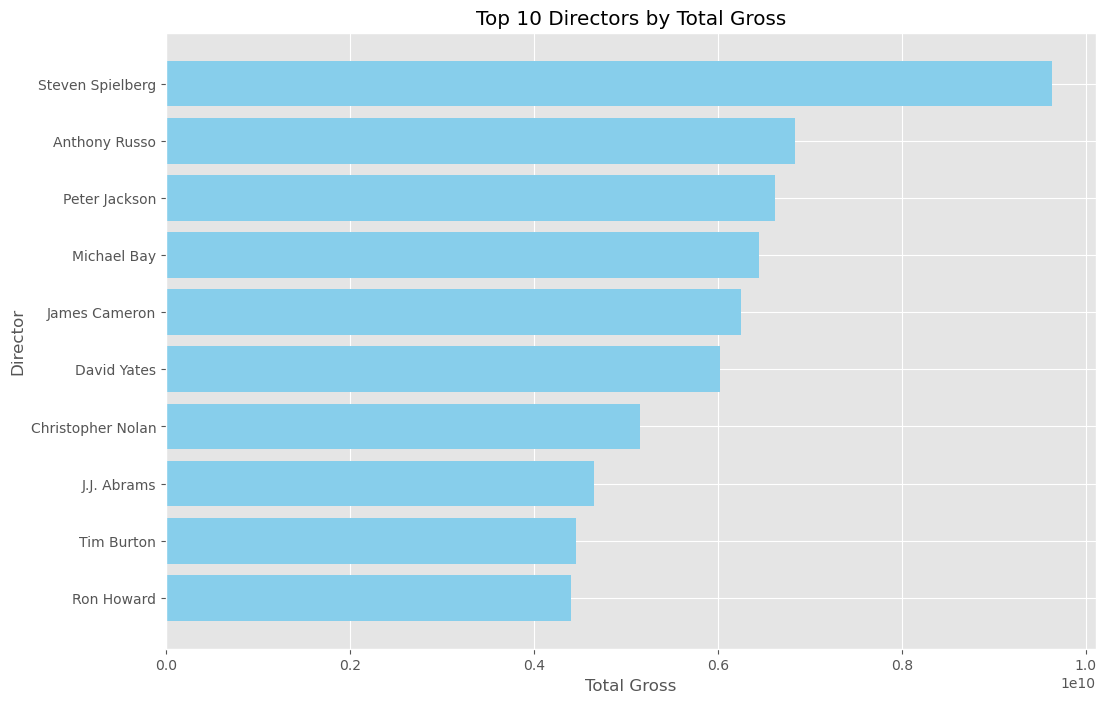

In [19]:
top_directors_gross = (df.groupby('director')
                       .agg({'gross': 'sum'})
                       .nlargest(10, 'gross')
                      )

top_directors_gross

plt.barh(top_directors_gross.index, top_directors_gross['gross'], color='skyblue')
plt.xlabel('Total Gross')
plt.ylabel('Director')
plt.title('Top 10 Directors by Total Gross')
plt.gca().invert_yaxis()  # Invert y-axis to have the director with the highest gross on top
plt.show()

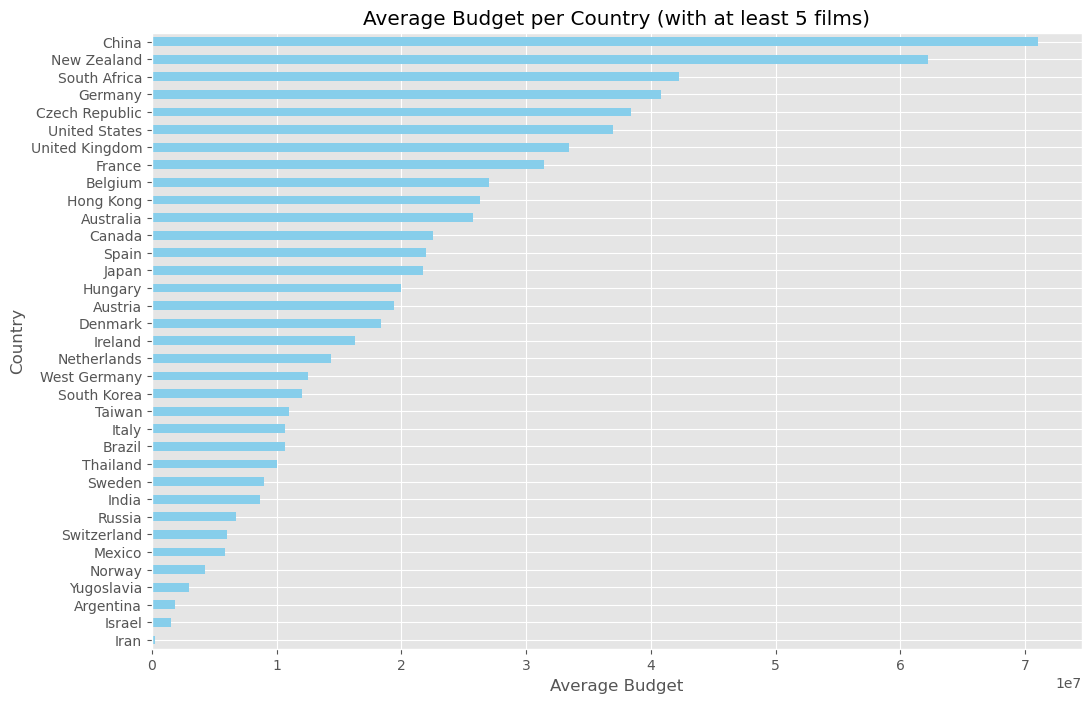

In [24]:
#Countries with highest gross average with 5 or more films in the dataset
gross_per_country = (df[df['country'].isin(df['country'].value_counts()[lambda x: x >= 5].index)]
                     .groupby('country')['budget']
                     .mean()
                     .sort_values(ascending=True)
)

gross_per_country.plot(kind='barh', color='skyblue')
plt.xlabel('Average Budget')
plt.ylabel('Country')
plt.title('Average Budget per Country (with at least 5 films)')
plt.show()

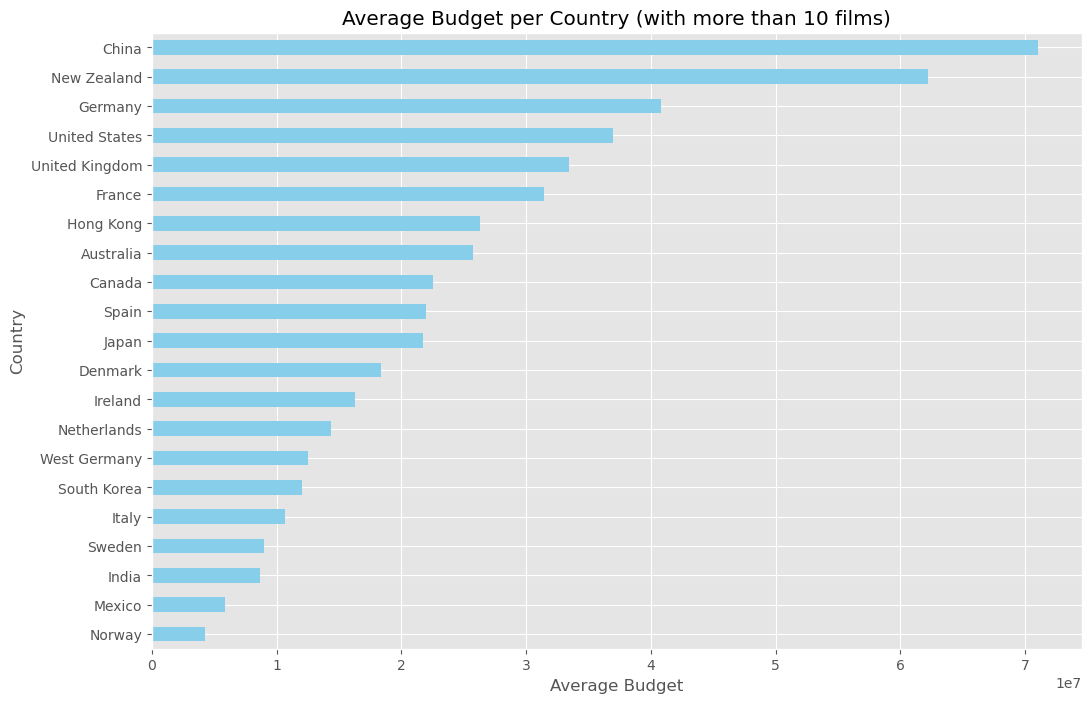

In [5]:
#Now with more than 10
gross_per_country = (df[df['country'].isin(df['country'].value_counts()[lambda x: x > 10].index)]
                     .groupby('country')['budget']
                     .mean()
                     .sort_values(ascending=True)
)

gross_per_country.plot(kind='barh', color='skyblue')
plt.xlabel('Average Budget')
plt.ylabel('Country')
plt.title('Average Budget per Country (with more than 10 films)')
plt.show()

China and New Zeland keep showing very good numbers in the top.
Germany, United States, United Kingdom and France followed with a good average.

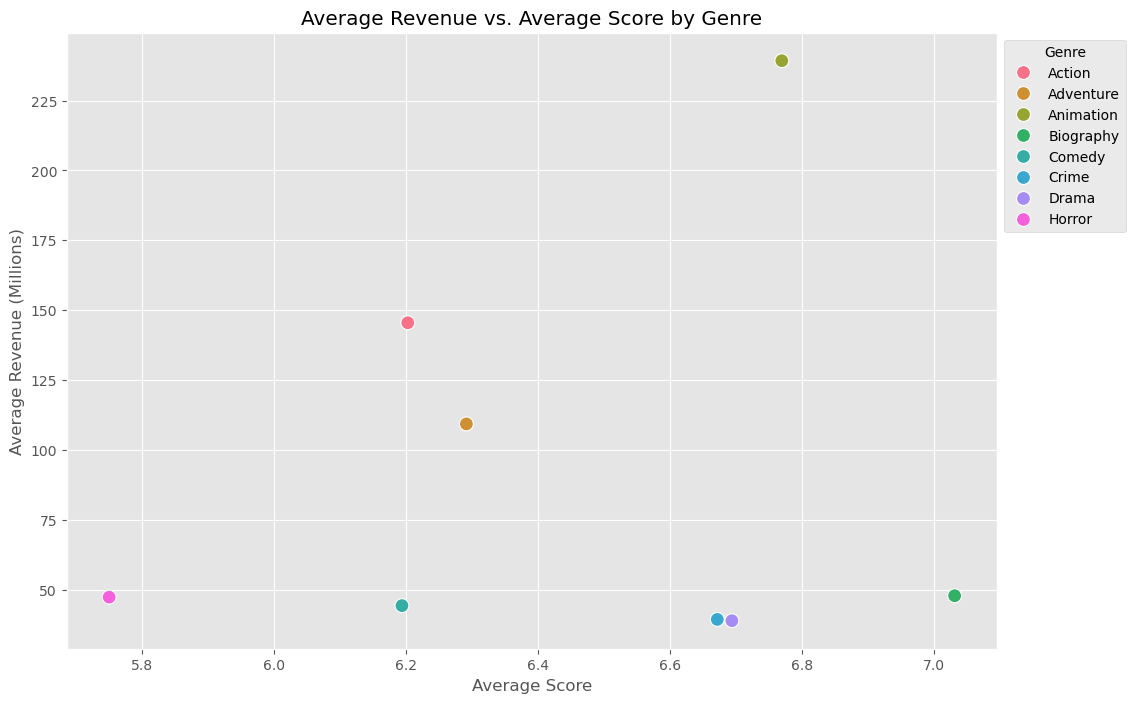

In [8]:
#Let's check genre that gives higher revenues and get better scores 

#From the cleaning step (section 1) I figured out that 11 genres has less than 300 movies
#I will just evaluate the genres with enough records in the dataset >= 300

genres_with_min_quantity = df['genre'].value_counts()[df['genre'].value_counts() >= 300].index
filtered_df = df[df['genre'].isin(genres_with_min_quantity)]
avg_revenue_genre = filtered_df.groupby('genre')['gross'].mean() / 1000000  # Convert to millions
avg_score_genre = filtered_df.groupby('genre')['score'].mean()
avg_stats = pd.DataFrame({'avg_revenue (Millions)': avg_revenue_genre, 'avg_score': avg_score_genre})


sns.scatterplot(data=avg_stats, x='avg_score', y='avg_revenue (Millions)', hue=avg_stats.index, s=100)
plt.title('Average Revenue vs. Average Score by Genre')
plt.xlabel('Average Score')
plt.ylabel('Average Revenue (Millions)')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()




As already knew, animation is getting the best results in terms of score and revenue.

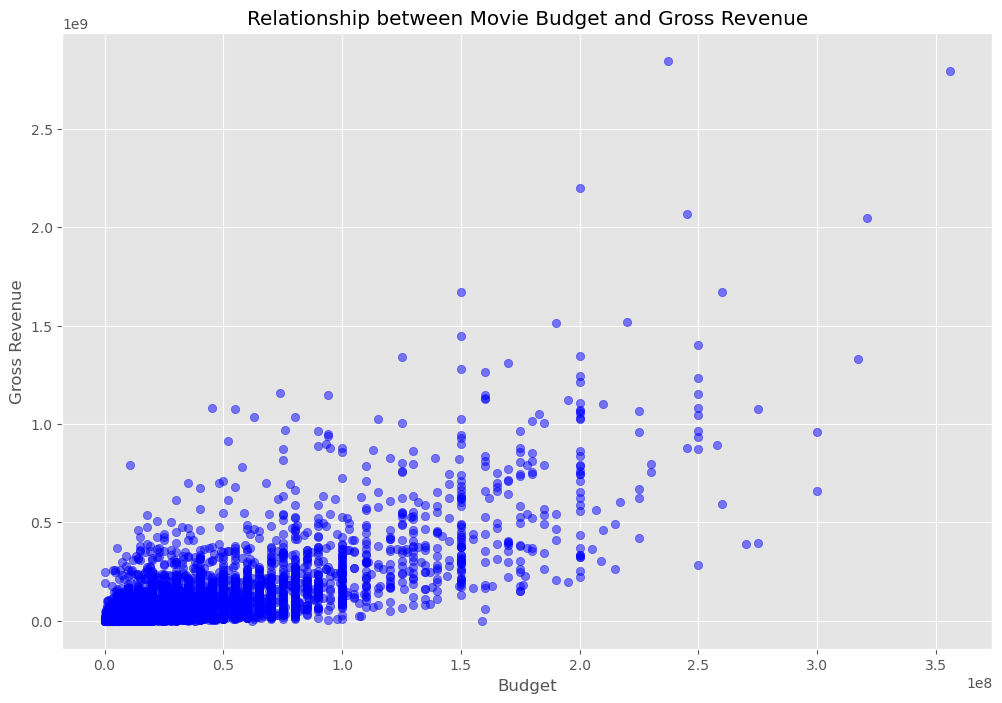

In [2]:
#4- Questions
#Let's reply some questions before diving deep into correlations section

#I just explore how linked are the budget and gross revenue
plt.scatter(df['budget'], df['gross'], alpha=0.5, color='blue')
plt.title('Relationship between Movie Budget and Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.show()


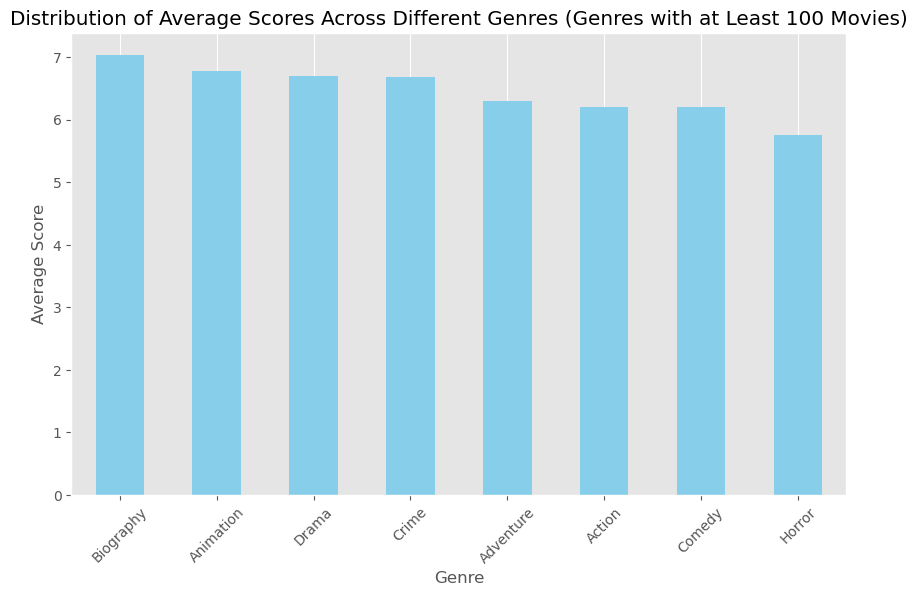

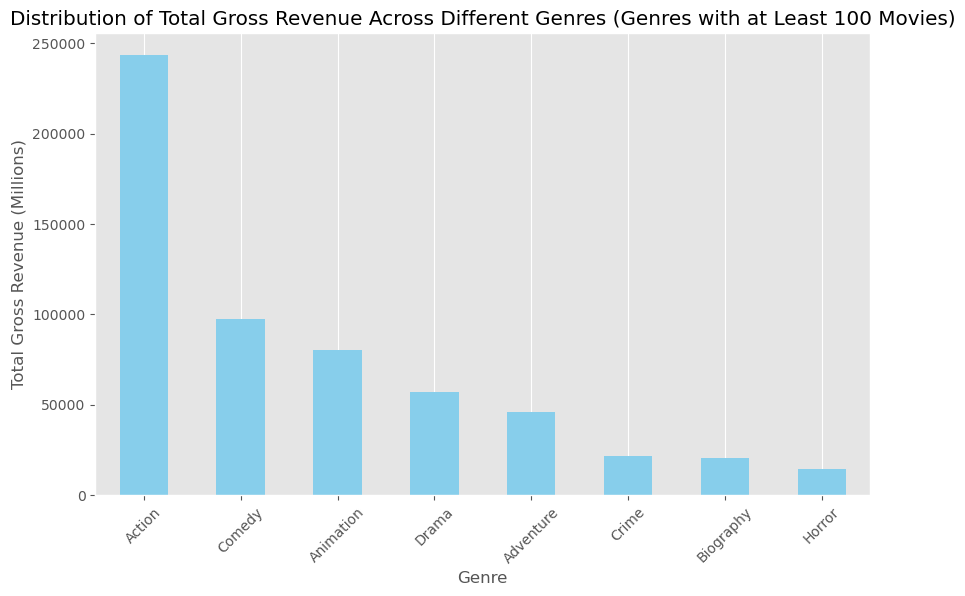

In [13]:
#How is the distribution of average scores and gross revenue across different genres with at least 100 of movies?
genres_with_100_movies = df['genre'].value_counts()[df['genre'].value_counts() >= 100].index
df_filtered = df[df['genre'].isin(genres_with_100_movies)].copy()  # Make a copy to avoid SettingWithCopyWarning
df_filtered.loc[:, 'gross_millions'] = df_filtered['gross'] / 1000000


avg_scores_by_genre = df_filtered.groupby('genre')['score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_scores_by_genre.plot(kind='bar', color='skyblue')
plt.title('Distribution of Average Scores Across Different Genres (Genres with at Least 100 Movies)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

total_gross_by_genre = df_filtered.groupby('genre')['gross_millions'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
total_gross_by_genre.plot(kind='bar', color='skyblue')
plt.title('Distribution of Total Gross Revenue Across Different Genres (Genres with at Least 100 Movies)')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Animation is still doing great. Comedy and Action are both genres with good overall results.

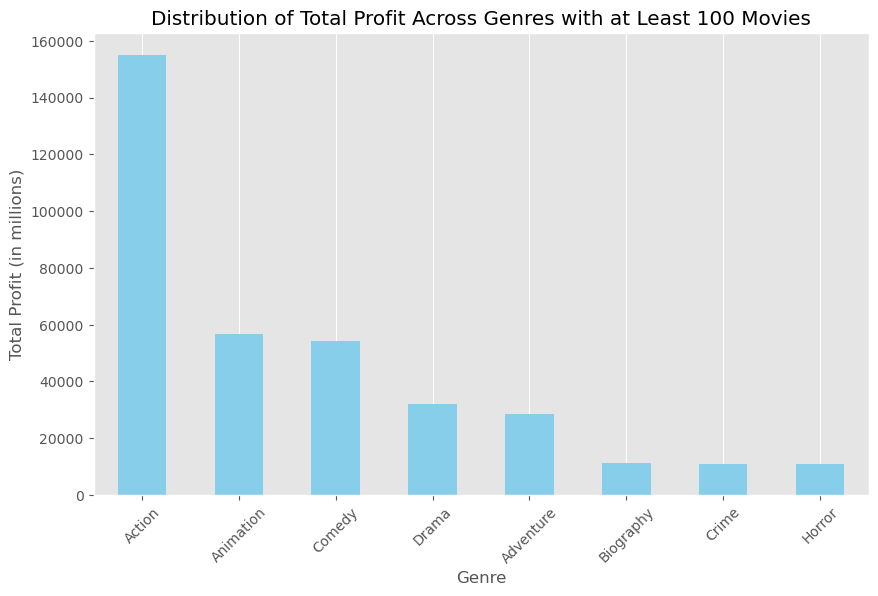

In [4]:
#Then let's check the profit (difference between gross and budget)
genres_with_100_movies = df['genre'].value_counts()[df['genre'].value_counts() >= 100].index
df_filtered = df[df['genre'].isin(genres_with_100_movies)].copy()  # Make a copy to avoid SettingWithCopyWarning
df_filtered.loc[:, 'gross_millions'] = df_filtered['gross'] / 1000000
df_filtered['profit'] = df_filtered['gross'] - df_filtered['budget']

total_profit_by_genre = ((df_filtered.groupby('genre')['profit']
                         .sum() / 1000000)
                         .sort_values(ascending=False)
)
plt.figure(figsize=(10, 6))
total_profit_by_genre.plot(kind='bar', color='skyblue')
plt.title('Distribution of Total Profit Across Genres with at Least 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Total Profit (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Action movies are far on the top followed by animation and comedy with one third of profits respectively in comparisson.
Animation keep the good trend as it was third in terms of investment but second over comedy in terms of profit.

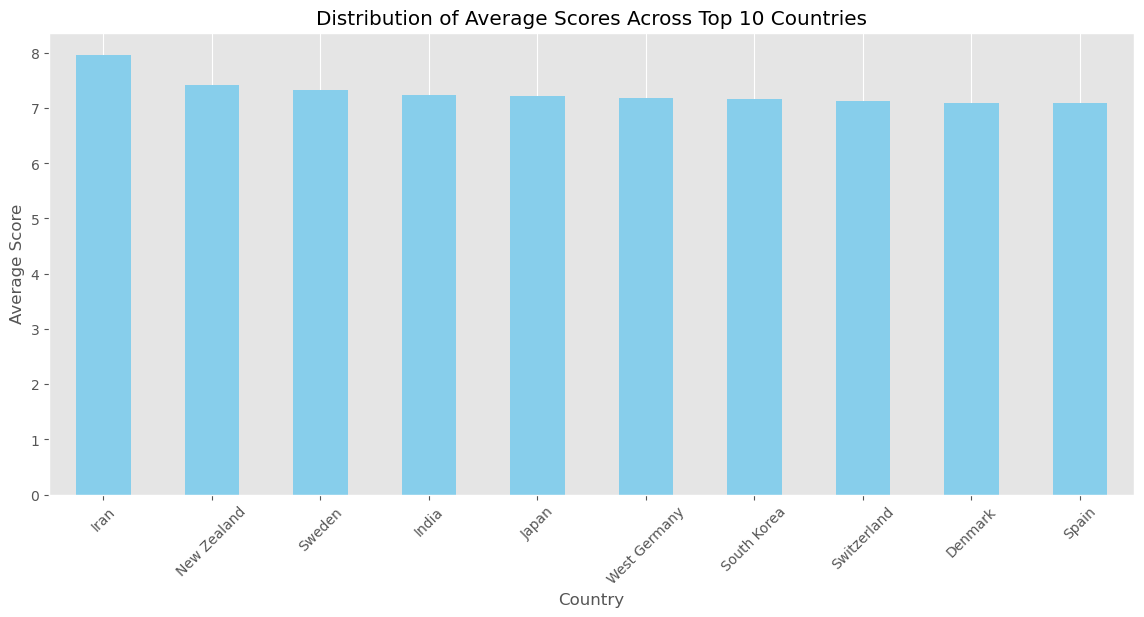

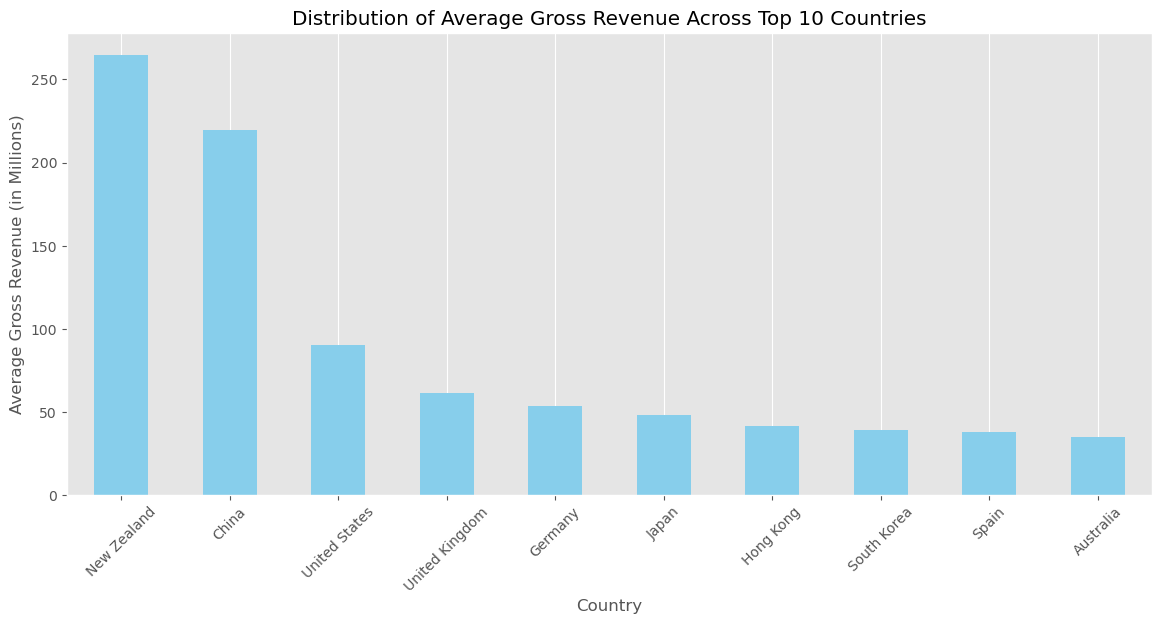

In [25]:
#What about the score across top 10 countries with at least 10 movies?
min_movies = 10
avg_scores_by_country = (df.groupby('country')['score']
                         .mean()  # Calculate the mean score per country
                         .loc[lambda x: df.groupby('country').size() >= min_movies]
                         .nlargest(10) 
                         .sort_values(ascending=False)
                        )

plt.figure(figsize=(14, 6))
avg_scores_by_country.plot(kind='bar', color='skyblue')
plt.title('Distribution of Average Scores Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#And the gross revenue top 10 countries?
df['gross_millions'] = df['gross'] / 1000000 #Make gross in millions would be easy to understand
min_movies = 10 
avg_gross_by_country = (df.groupby('country')['gross_millions']
                         .mean()
                         .loc[lambda x: df.groupby('country').size() >= min_movies]
                         .nlargest(10) 
                         .sort_values(ascending=False)
                        )

                        


plt.figure(figsize=(14, 6))
avg_gross_by_country.plot(kind='bar', color='skyblue')
plt.title('Distribution of Average Gross Revenue Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Average Gross Revenue (in Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


New Zeland gets great both in score and gross.

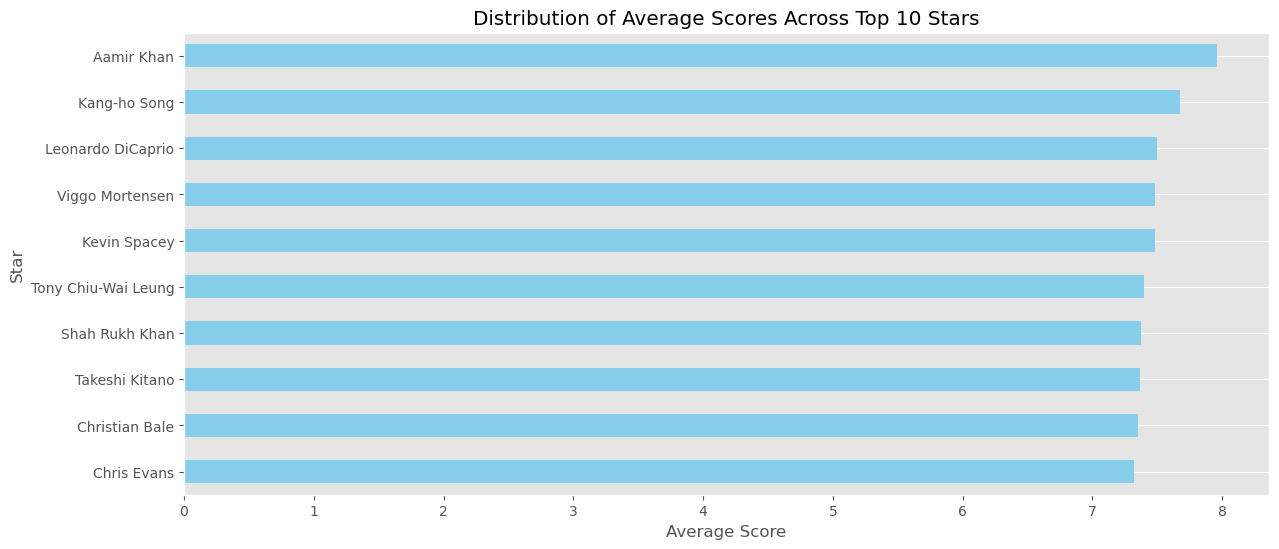

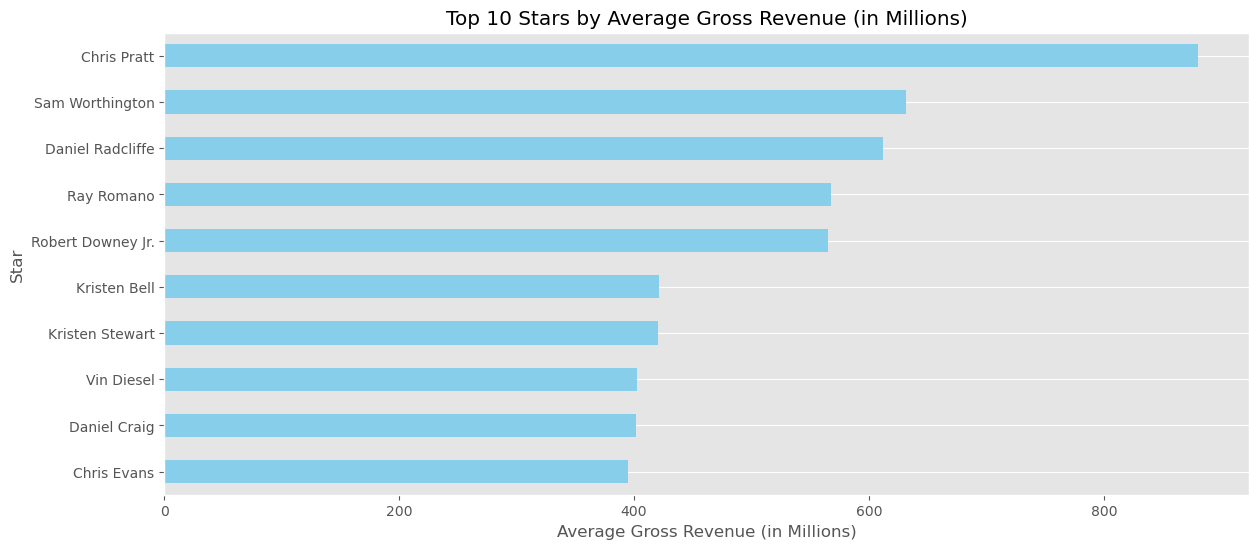

In [23]:
#What about then across different stars, both gross revenue and scores?
#As the dataset is large, let's only do for the top 10 with at least 5 movies

min_movies = 5
avg_scores_by_star = (df.groupby('star')['score']
                         .mean()  # Calculate the mean score per country
                         .loc[lambda x: df.groupby('star').size() >= min_movies]
                         .nlargest(10) 
                         .sort_values(ascending=True)
                        )

plt.figure(figsize=(14, 6))
avg_scores_by_star.plot(kind='barh', color='skyblue')
plt.title('Distribution of Average Scores Across Top 10 Stars')
plt.xlabel('Average Score')
plt.ylabel('Star')
plt.grid(axis='x')
plt.show()


#And the gross revenue top 10 stars?
df['gross_millions'] = df['gross'] / 1000000 #Convert gross in x-axis to millions
min_movies = 5
avg_gross_by_star = (df.groupby('star')['gross_millions']
                         .mean()
                         .loc[lambda x: df.groupby('star').size() >= min_movies]
                         .nlargest(10) 
                         .sort_values(ascending=True)
                    )

# Plotting
plt.figure(figsize=(14, 6))
avg_gross_by_star.plot(kind='barh', color='skyblue')
plt.title('Top 10 Stars by Average Gross Revenue (in Millions)')
plt.xlabel('Average Gross Revenue (in Millions)')
plt.ylabel('Star')
plt.grid(axis='x')
plt.show()



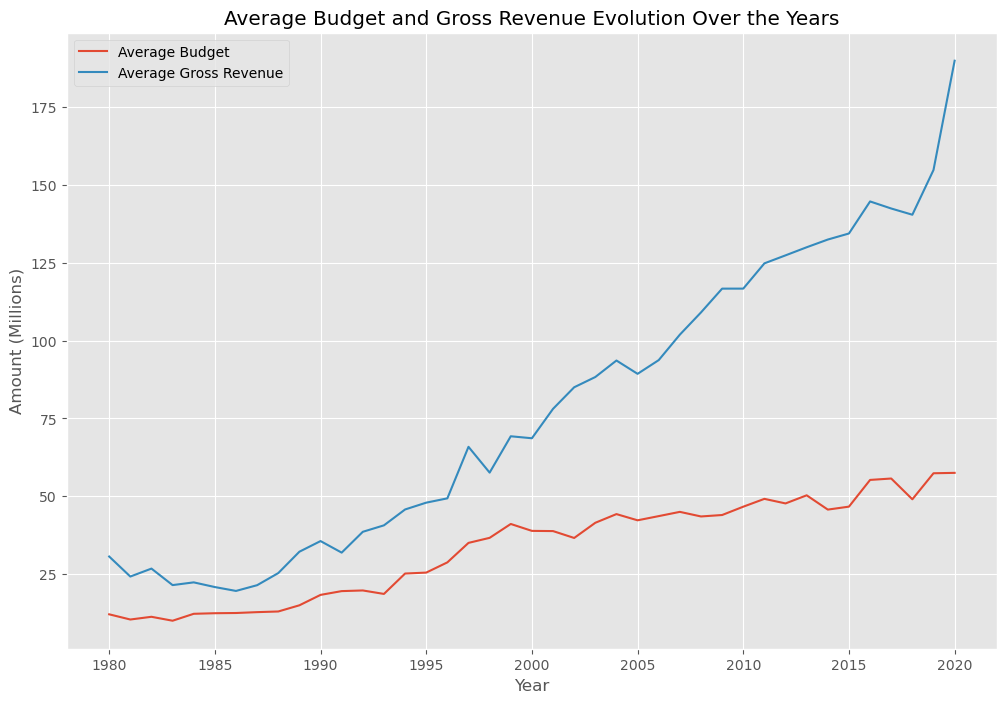

In [4]:
#How the average budget and gross revenue evolved through the years?
avg_budget_by_year = df.groupby('year')['budget'].mean().reset_index()
avg_gross_by_year = df.groupby('year')['gross'].mean().reset_index()
avg_budget_years = avg_budget_by_year['year'].values
avg_budget_values = avg_budget_by_year['budget'].values
avg_gross_years = avg_gross_by_year['year'].values
avg_gross_values = avg_gross_by_year['gross'].values

avg_budget_values_millions = avg_budget_values / 1000000
avg_gross_values_millions = avg_gross_values / 1000000

plt.plot(avg_budget_years, avg_budget_values_millions, label='Average Budget')
plt.plot(avg_gross_years, avg_gross_values_millions, label='Average Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Amount (Millions)')
plt.title('Average Budget and Gross Revenue Evolution Over the Years')
plt.legend()
plt.show()

By 2000 we can see an exponental increase of the gross revenue in relation with the budget what make it clear that the profits since then grew considerably, specially on last decade of the dataset.

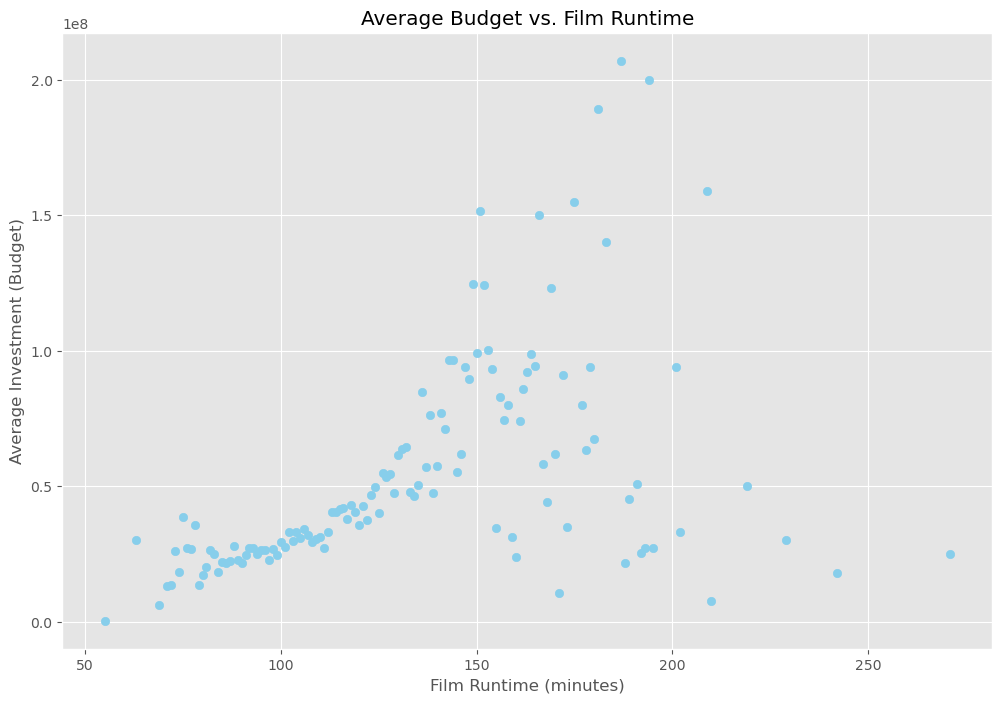

In [12]:
#Do the longest films required more investment?
avg_budget_by_runtime = df.groupby('runtime')['budget'].mean()

plt.scatter(avg_budget_by_runtime.index, avg_budget_by_runtime.values, color='skyblue')
plt.title('Average Budget vs. Film Runtime')
plt.xlabel('Film Runtime (minutes)')
plt.ylabel('Average Investment (Budget)')
plt.show()

#Later on we would see a correlation for better understanding (section 5)

We see some correlation but not as strongest as pressumed.

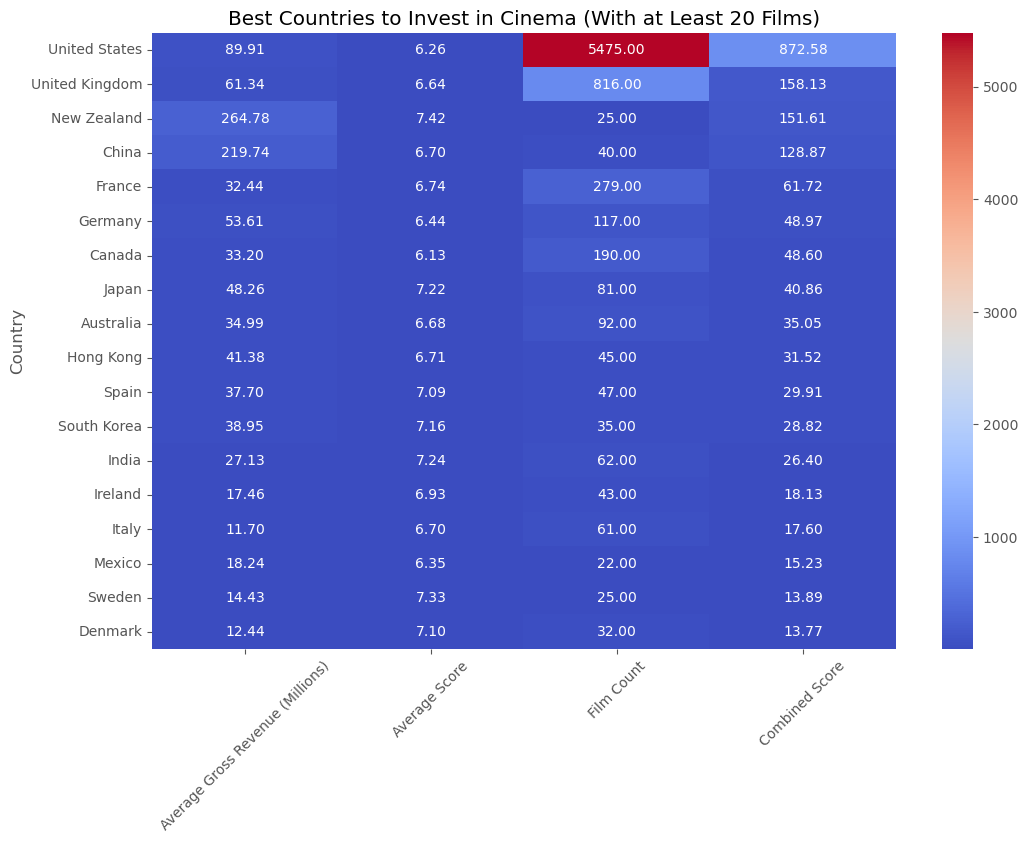

In [6]:
#Which are the best countries for investing in the film industry?
#This question is far too complex so I will try to ponderate 3 main variables
#Gross, score and quantity of films released can give a better understanding

filtered_df = df.groupby('country').filter(lambda x: len(x) >= 20) #Countries with at least 20 films
avg_gross_by_country = filtered_df.groupby('country')['gross'].mean()
avg_score_by_country = filtered_df.groupby('country')['score'].mean()
film_count_by_country = filtered_df['country'].value_counts()
avg_gross_by_country_millions = avg_gross_by_country / 1000000

# Combine the metrics into a single DataFrame 
invest_score = pd.DataFrame({
    'Average Gross Revenue (Millions)': avg_gross_by_country_millions,
    'Average Score': avg_score_by_country,
    'Film Count': film_count_by_country
})

# Calculate a combined score
invest_score['Combined Score'] = 0.55 * invest_score['Average Gross Revenue (Millions)'] + \
                                 0.3 * invest_score['Average Score'] + \
                                 0.15 * invest_score['Film Count'] #Filter above was set for 20 or more films

# Sort the countries based on the combined score
best_countries = invest_score.sort_values(by='Combined Score', ascending=False)

sns.heatmap(best_countries[['Average Gross Revenue (Millions)', 'Average Score', 'Film Count', 'Combined Score']], 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Best Countries to Invest in Cinema (With at Least 20 Films)')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()



As the films released per country has huge difference, to minimize the impact it was considered just as 0.1 (10% importance), while focusing in gross and score (as they are both average it looks fair enough).
United States is the country where there is a higher amount of films released while score is on average and gross revenue on third position after New Zeland and China that get great overall results.
We can see once again that United States, New Zeland, China, United Kingdom, France and Germany are on the top, what makes it clear that those countries are good for film investment.

The correlation coefficient is 0.25


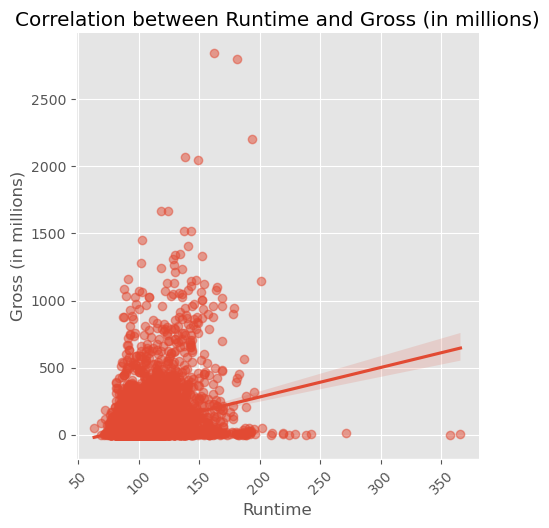

In [11]:
#5-Correlation analysis

#Correlation of runtime and gross linked to question on section 4
df['gross_millions'] = df['gross'] / 1000000
correlation = df['runtime'].corr(df['gross_millions'])


print(f'The correlation coefficient is {correlation:.2f}')

sns.lmplot(data=df, x='runtime', y='gross_millions', scatter_kws={'alpha':0.5})
plt.title('Correlation between Runtime and Gross (in millions)')
plt.xlabel('Runtime')
plt.ylabel('Gross (in millions)')
plt.xticks(rotation=45)
plt.show()

We see a correlation coefficient of 0.25 that indicates a weak positive correlation. This correlation suggests that there is a tendency for movies with longer runtimes to have slightly higher budgets, though the relationship is not very strong. However, it's crucial to recognize that many factors contribute to the budget of a movie, and runtime is just one of them. Other influential factors could include genre, cast, special effects, marketing strategies, and more.

Pearson Correlation between score and runtime: 0.39945108236463434


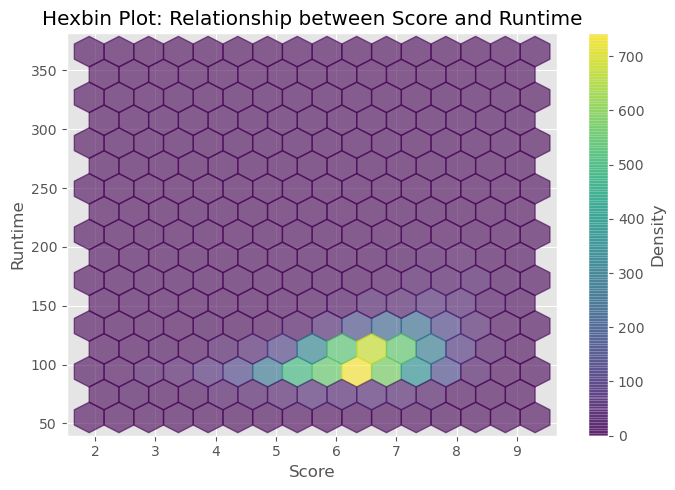

In [5]:
#Correlation between Score and Runtime using Hexbin Plot
corr = df['score'].corr(df['runtime'], method='pearson')
print("Pearson Correlation between score and runtime:", corr)


plt.figure(figsize=(7,5))
plt.hexbin(df['score'], df['runtime'], gridsize=15, cmap='viridis', alpha=0.6)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.title('Hexbin Plot: Relationship between Score and Runtime')
plt.colorbar(label='Density')
plt.grid(True)
plt.tight_layout()
plt.show()




We can see that as one variable increases, the other tends to increase as well, but the relationship is not very strong.
A Pearson correlation coefficient of almost 0.40 indicates that there is a tendency for movies with longer runtimes to have slightly higher scores. However, it's important to note that the correlation is not very strong, so there could be other factors influencing the scores of movies.
The hexbin plot is like a map that shows us where the action is happening represented by the density of colors. In order to see which areas has lot of dots, the hexagon will be darker. This helps us see where most of the data points are concentrated and if there are any patterns between runtime and score. So between 90-120 mins and 6 and 7 points (review scores) is the big majority of the action in terms of dots.

In [31]:
correlation = df['runtime'].corr(df['budget'])

print(f"Correlation between runtime and budget: {correlation:.2f}")

Correlation between runtime and budget: 0.32


Moderate positive correlation between budget and runtime.
It could mean that longer films need more investment, but the correlation does not imply causation. 
In other words, wile longer films often involve higher budgets due to factors like extended production time, special effects, larger casts, etc., the correlation does not imply a causal relationship.
Other factors such as genre, production quality, marketing strategies, and talent involved in the film also contribute to budget investment.

Correlation between score and runtime: 0.3995


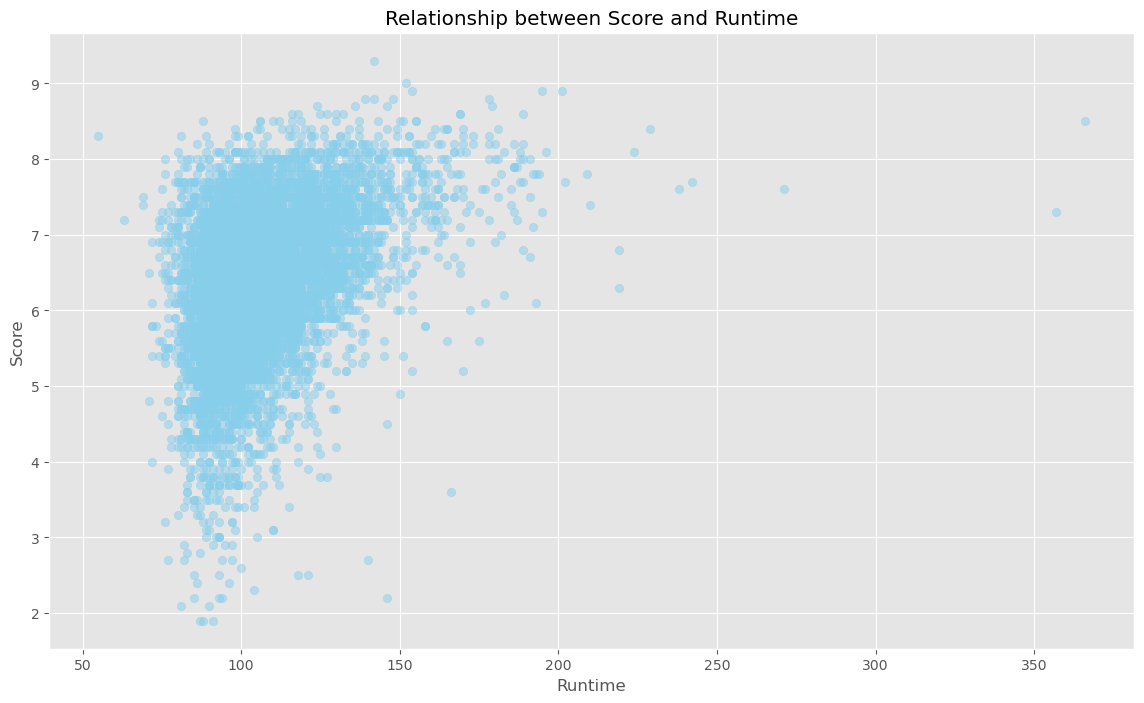

In [29]:
#Correlation between runtime and score 
#This time will change the visualization to a scatter plot 
correlation = df['score'].corr(df['runtime'])
print(f"Correlation between score and runtime: {correlation:.4f}")


plt.figure(figsize=(14, 8))
plt.scatter(df['runtime'], df['score'], color='skyblue', alpha=0.5)
plt.xlabel('Runtime')
plt.ylabel('Score')
plt.title('Relationship between Score and Runtime')
plt.grid(True)
plt.show()


As we checked before the correlation with Hexbin plot there is a nodal are that here we can see in more detail between 5-8 (score) 85-135 (minutes)

Correlation between score and budget: 0.076


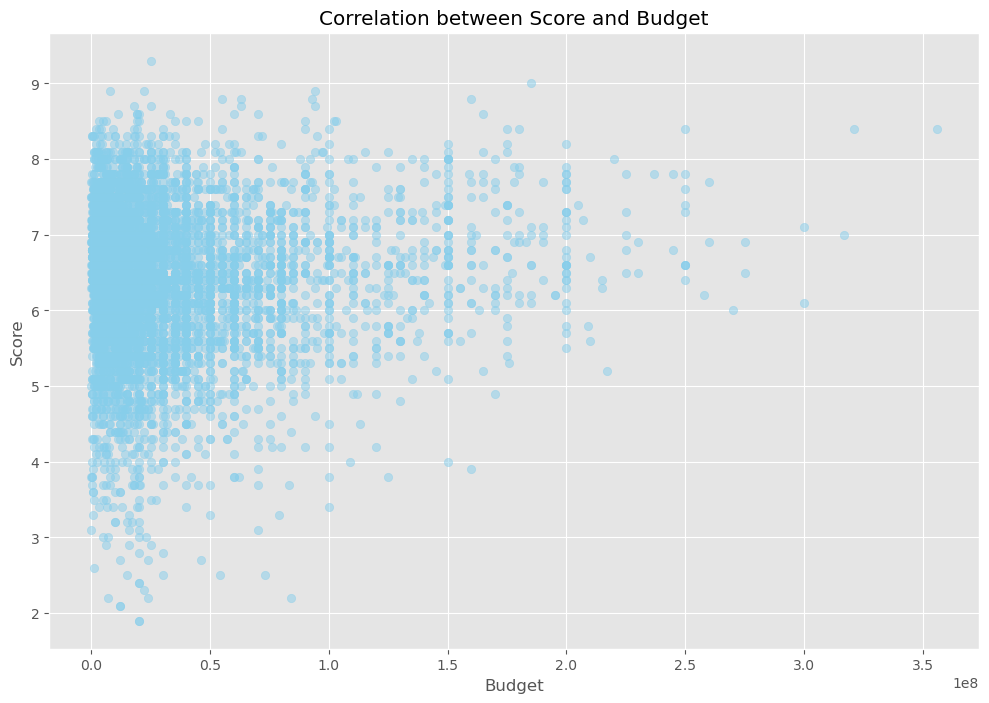

In [33]:
#Correlation between score and budget
#I want to see if longer films tend to request higher budget
correlation = df['score'].corr(df['budget'])
print(f"Correlation between score and budget: {correlation:.3f}")


plt.scatter(df['budget'], df['score'], color='skyblue', alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Score')
plt.title('Correlation between Score and Budget')
plt.grid(True)
plt.show()

There is a very low correlation between budget and score. 
So higher money investment doesn't traduce into better scores.

Correlation between budget and runtime: 0.3204


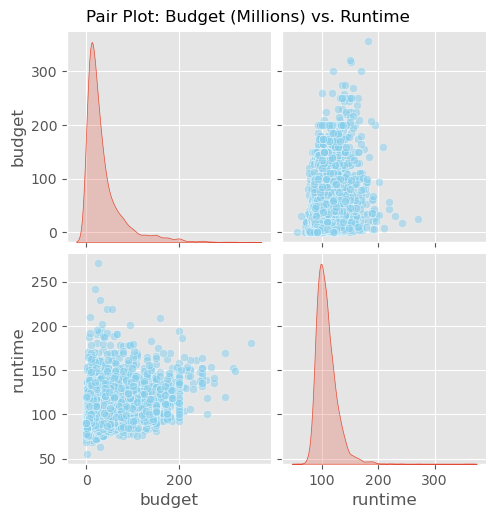

In [49]:
# Calculate the correlation between budget and runtime
#But this time using a pair plot instead of a scatter plot 
#The main reason is because it provides multiple variables simultaneously to observer in detail.
df['budget'] = df['budget'] / 1000000
correlation = df['budget'].corr(df['runtime'])
print(f"Correlation between budget and runtime: {correlation:.4f}")

sns.pairplot(df, vars=['budget', 'runtime'], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5, 'color':'skyblue'})
plt.suptitle('Pair Plot: Budget (Millions) vs. Runtime', y=1.02)
plt.show()

There is a kind of moderate correlation between runtime and budget but not that drastic as believed in advance.

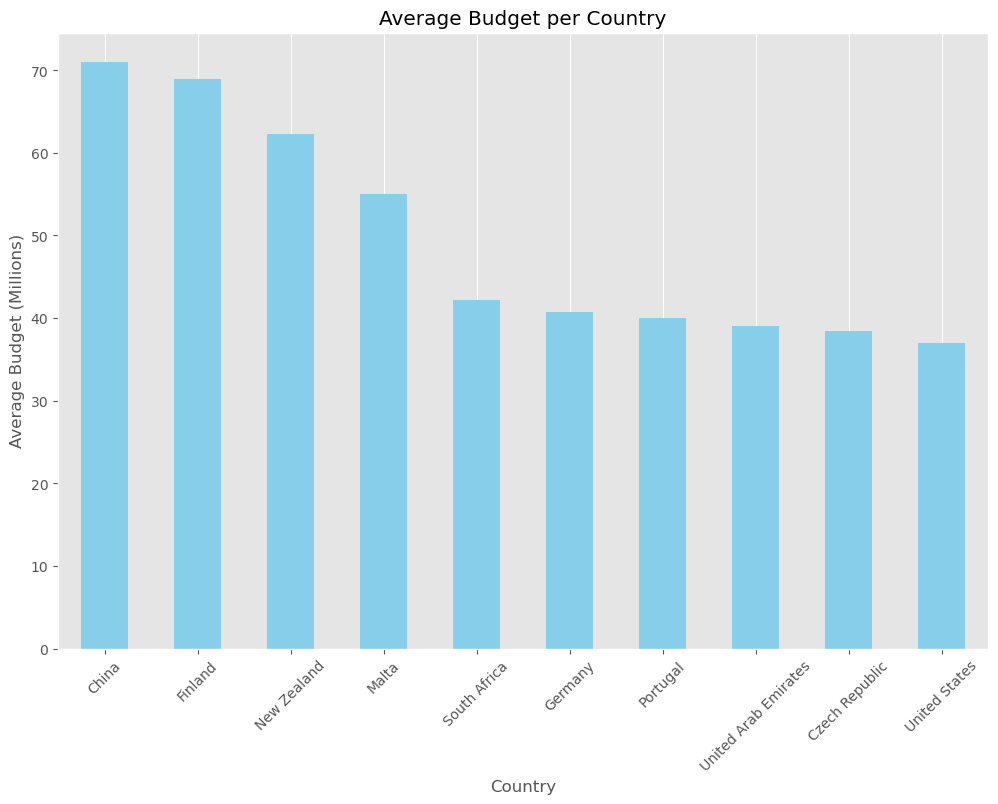

In [38]:
#Let's see how is the correlation between budget per each country (top 10)
avg_budget_per_country = (df.groupby('country')['budget']
                           .mean()
                           .nlargest(10) / 1000000  # Convert to millions
)


# Visualize the correlations
avg_budget_per_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Budget (Millions)')
plt.title('Average Budget per Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

China and New Zeland once again getting one of the best results. While Germany and United Stated keep on the top ten, making clear among wich countries the film industry is solid.

Correlation between budget and gross revenue: 0.740


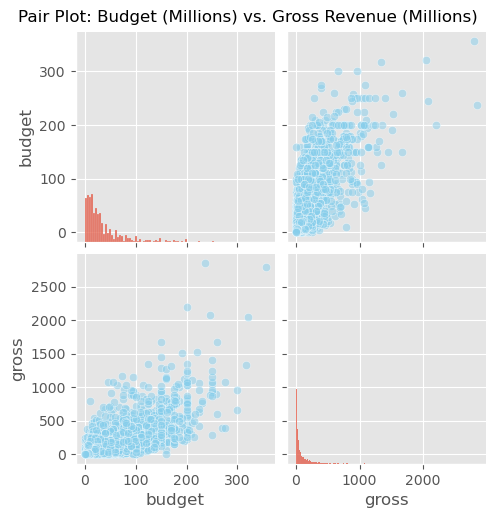

In [54]:
#Correlation between budget and gross
df['budget'] = df['budget'] / 1000000
df['gross'] = df['gross'] / 1000000
correlation = df['budget'].corr(df['gross'])
print(f"Correlation between budget and gross revenue: {correlation:.3f}")

sns.pairplot(df, vars=['budget', 'gross'], kind='scatter', plot_kws={'alpha':0.5, 'color':'skyblue'})
plt.suptitle('Pair Plot: Budget (Millions) vs. Gross Revenue (Millions)', y=1.02)
plt.show()

As we could pressume before the analysis there is strong correlation between the budget invested and the gross revenue

In [12]:
#Correlation between top score genres and higher gross revenue
avg_gross_by_genre = df.groupby('genre')['gross'].mean()
top_score_genres = avg_gross_by_genre.nlargest(5).index
df_top_genres = df[df['genre'].isin(top_score_genres)]
correlation = df_top_genres['gross'].corr(df_top_genres['score'])

print(f"Correlation between top score genres and gross: {correlation:.3f}")


Correlation between top score genres and gross: 0.315


We can see a positive correlation between the movie scores and gross revenue when it comes to the top genres.The correlation implies that movies belonging to genres that consistently receive higher scores tend to attract more viewers and generate higher revenue
These types of correlation can be valuable for movie studios and filmmakers. They can make informed decisions about genre selection, budget allocation, and marketing strategies to maximize revenue potential.

In [3]:
#6. Insights
#Factors that contribute to the success of a movie (genres, budget, star)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
genre_counts = df['genre'].value_counts()
popular_genres = genre_counts[genre_counts >= 100].index
df_filtered = df[df['genre'].isin(popular_genres)]
average_performance_by_genre_budget = df_filtered.groupby(['genre', pd.cut(df_filtered['budget'], bins=5)])['gross'].mean()
average_performance_by_genre_star = df_filtered.groupby(['genre', 'star'])['gross'].mean()

print("\nAverage Performance by Genre and Budget:")
print(average_performance_by_genre_budget)
print("\nAverage Performance by Genre and Star:")
print(average_performance_by_genre_star)




Average Performance by Genre and Budget:
genre      budget                    
Action     (-352997.0, 71202400.0]       7.075219e+07
           (71202400.0, 142401800.0]     2.834969e+08
           (142401800.0, 213601200.0]    5.640087e+08
           (213601200.0, 284800600.0]    9.700576e+08
           (284800600.0, 356000000.0]    1.559497e+09
Adventure  (-352997.0, 71202400.0]       5.831139e+07
           (71202400.0, 142401800.0]     3.336477e+08
           (142401800.0, 213601200.0]    5.928651e+08
           (213601200.0, 284800600.0]    8.048341e+08
           (284800600.0, 356000000.0]             NaN
Animation  (-352997.0, 71202400.0]       1.166606e+08
           (71202400.0, 142401800.0]     3.556739e+08
           (142401800.0, 213601200.0]    6.210627e+08
           (213601200.0, 284800600.0]    1.131595e+09
           (284800600.0, 356000000.0]             NaN
Biography  (-352997.0, 71202400.0]       5.594980e+07
           (71202400.0, 142401800.0]     1.972214e+08
  

/tmp/ipykernel_1002/1468620955.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_performance_by_genre_budget = df_filtered.groupby(['genre', pd.cut(df_filtered['budget'], bins=5)])['gross'].mean()


In [4]:
#Following from previous insights
#Focus now in stars
budget_summary_stats = df['budget'].describe()
budget_performance_correlation = df[['budget', 'gross']].corr()

top_stars = df['star'].value_counts().head(10)
average_performance_by_star = df.groupby('star')['gross'].mean()

print("\nBudget Summary Statistics:")
print(budget_summary_stats)
print("\nBudget-Gross Correlation:")
print(budget_performance_correlation)
print("\nTop Stars:")
print(top_stars)
print("\nAverage Performance by Star:")
print(average_performance_by_star)


Budget Summary Statistics:
count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64

Budget-Gross Correlation:
          budget     gross
budget  1.000000  0.740395
gross   0.740395  1.000000

Top Stars:
star
Nicolas Cage          43
Robert De Niro        41
Tom Hanks             41
Denzel Washington     37
Bruce Willis          34
Tom Cruise            34
Johnny Depp           33
Sylvester Stallone    32
John Travolta         31
Mel Gibson            29
Name: count, dtype: int64

Average Performance by Star:
star
'Weird Al' Yankovic    6.157157e+06
50 Cent                4.656396e+07
A.J. Cook              9.094113e+07
Aaliyah                4.547911e+07
Aamir Khan             6.509909e+07
                           ...     
Zoe Saldana            7.150844e+07
Zoey Deutch            3.762487e+07
Zooey Deschanel        3.069022e+07
Álex An

In [5]:
#Profit by decades
df_filtered = df[df['year'] != 2020].copy()
df_filtered['profit'] = df_filtered['gross'] - df_filtered['budget']
decade_bins = [1979, 1989, 1999, 2009, 2019]
decade_labels = ['1980-1989', '1990-1999', '2000-2009', '2010-2019']
df_filtered['decade'] = pd.cut(df_filtered['year'], bins=decade_bins, labels=decade_labels)
profit_by_decade = df_filtered.groupby('decade', observed=False)['profit'].sum() #observed to prevent code from future update
for decade, profit in profit_by_decade.items():
    print(f"Decade: {decade}, Profit: {profit / 1e6:.2f} million")


Decade: 1980-1989, Profit: 19755.20 million
Decade: 1990-1999, Profit: 50273.64 million
Decade: 2000-2009, Profit: 109315.04 million
Decade: 2010-2019, Profit: 183814.52 million


Let's summarize a bit to get more clear where and how to invest in the film industry.

Animation movies has been shown very good results in absolute terms (for example in score get distance from Action and Comedy that have been consistent in other statistics). As said on the previous sections, Action (has the higher revenues) and Comedy are on the top genres keeping the trend through the years with Animation as the most consistent in all the measures.

It is evident, from the trend analysis of gross revenue and budget over the last 20 years (as shown in Section 4), that there has been a notable pattern since 2000. Gross revenue has consistently outpaced budget growth, particularly highlighted by spikes in 2005 and mororver in 2010 onwards. 

On all that period (2005-2020) the budget has been increased by a 15-20% while the gross revenue has been increasing between 100-140%. This disparity has resulted in a steady increase in profit margins over time, reinforcing the attractiveness of the cinema industry as an investment opportunity.

It is good emphasize the investment in countries like New Zeland, United States, China, German, France, United Kingdom, while still point out the overall performance in Animation, Comedy and Action movies that are far away the best option when choosing a genre. 